## CREAZIONE DEL DATASET PANDAS A PARTIRE DAI JSON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns
from tqdm import tqdm
import statsmodels.tsa.stattools as smt
from collections import Counter
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [2]:
# lista di tutti i file json

json_path_list = pathlib.Path('../data/original/').glob('**/*.json')

In [3]:
# contiene tupla con i soli dati necessari estratti dai json

rows_list = []
for i in tqdm(json_path_list):
    with open(i, 'r') as f:
        data = json.load(f)
    rows_list.append((data['TimeStamp'],
                      data['Message']['WeldLog']['spotName'],
                      data['Message']['WeldLog']['CurrentCurve'],
                      data['Message']['WeldLog']['VoltageCurve']))

222867it [26:46, 138.76it/s]


In [4]:
# da lista di tuple a dataset pandas
dataset = pd.DataFrame.from_records(
    rows_list, columns=['TimeStamp', 'spotName', 'CurrentCurve', 'VoltageCurve'])
dataset

,TimeStamp,spotName,CurrentCurve,VoltageCurve
0,2019-09-17T17:33:48,60061_0_00,"[312, 2067, 3862, 5267, 6398, 7217, 7959, 8700...","[134, 756, 1292, 1623, 1812, 1876, 1946, 2010,..."
1,2019-11-07T12:29:01,60090_0_00,None,None
2,2019-11-07T12:29:01,60092_0_00,None,None
3,2019-11-07T12:29:01,60094_0_00,None,None
4,2019-11-07T12:29:01,60096_0_00,None,None
...,...,...,...,...
222862,2020-05-28T15:00:04,60021_0_00,"[317, 2095, 3809, 4984, 5714, 6222, 6698, 7110...","[138, 777, 1332, 1675, 1888, 2008, 2100, 2193,..."
222863,2020-05-28T15:00:17,60023_0_00,"[317, 2065, 3781, 4926, 5688, 6229, 6801, 7118...","[139, 769, 1303, 1652, 1853, 1976, 2107, 2142,..."
222864,2020-05-28T15:00:17,60025_0_00,"[344, 2225, 4011, 5234, 6017, 6613, 7051, 7365...","[134, 763, 1284, 1602, 1779, 1863, 1946, 1972,..."
222865,2020-05-28T15:00:17,60027_0_00,"[303, 2034, 3644, 4767, 5526, 6103, 6437, 6680...","[136, 744, 1264, 1600, 1784, 1904, 1944, 1960,..."


In [5]:
# salvo in pickle per evitare di ripetere le procedure sopra
dataset.to_pickle('../data/original/raw_dataset.pkl')

## STATISTICHE DESCRITTIVE

In [6]:
dataset = pd.read_pickle("../data/original/raw_dataset.pkl")
dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'])
# consideriamo le saldature senza nome come fossero appertenenti al medesimo punto di saldatura (non lo sappiamo se è uno spotname o più a essere senza nome)
dataset['spotName'].replace('', '9999_9_99', inplace=True)
dataset.sort_values('TimeStamp', inplace=True)
print(dataset.dtypes)
dataset

TimeStamp       datetime64[ns]
spotName                object
CurrentCurve            object
VoltageCurve            object
dtype: object


,TimeStamp,spotName,CurrentCurve,VoltageCurve
0,2019-09-17 17:33:48,60061_0_00,"[312, 2067, 3862, 5267, 6398, 7217, 7959, 8700...","[134, 756, 1292, 1623, 1812, 1876, 1946, 2010,..."
75852,2019-09-17 17:33:48,60075_0_00,"[322, 2099, 3940, 5296, 6362, 7169, 7589, 7750...","[135, 749, 1256, 1534, 1698, 1777, 1748, 1648,..."
75853,2019-09-17 17:33:48,60141_0_00,"[214, 1995, 3836, 5125, 6107, 6813, 7182, 7427...","[95, 696, 1217, 1495, 1686, 1759, 1723, 1686, ..."
75854,2019-09-17 17:33:48,60163_0_00,"[323, 2137, 4047, 5472, 6475, 7090, 7544, 7803...","[139, 767, 1298, 1598, 1745, 1766, 1779, 1724,..."
75855,2019-09-17 17:33:48,60161_0_00,"[327, 2161, 4126, 5468, 6483, 7237, 7662, 7793...","[135, 763, 1263, 1534, 1677, 1748, 1705, 1627,..."
...,...,...,...,...
222858,2020-05-28 15:00:04,60017_0_00,None,None
222864,2020-05-28 15:00:17,60025_0_00,"[344, 2225, 4011, 5234, 6017, 6613, 7051, 7365...","[134, 763, 1284, 1602, 1779, 1863, 1946, 1972,..."
222865,2020-05-28 15:00:17,60027_0_00,"[303, 2034, 3644, 4767, 5526, 6103, 6437, 6680...","[136, 744, 1264, 1600, 1784, 1904, 1944, 1960,..."
222863,2020-05-28 15:00:17,60023_0_00,"[317, 2065, 3781, 4926, 5688, 6229, 6801, 7118...","[139, 769, 1303, 1652, 1853, 1976, 2107, 2142,..."


In [7]:
def plot_custom(dataset, kind, title, xlabel, ylabel, plot_size=(8, 6), tick_size=10):
    ax = dataset.plot(kind=kind, figsize=plot_size, fontsize=tick_size)
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(xlabel, fontsize=17)
    ax.set_xlabel(ylabel, fontsize=17)
    plt.show()

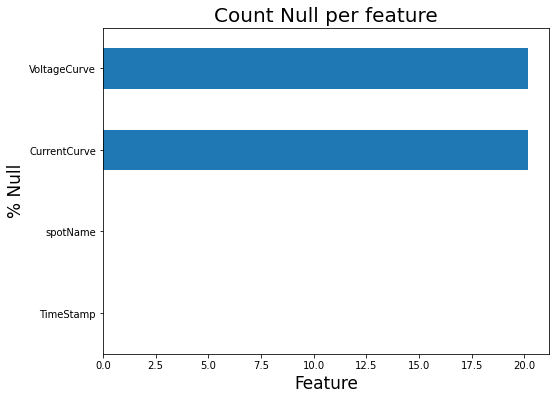

In [8]:
# 20% di misurazioni mancanti, se manca una colonna manca anche l'altra
null_per_features = dataset.isna().sum()/dataset.shape[0] * 100
plot_custom(null_per_features, 'barh',
            'Count Null per feature', '% Null', 'Feature')

O le due colonne sono presenti contemporaneamente, o entrambe mancano.

In [9]:
dataset[(dataset.VoltageCurve.isna()) & ~(dataset.CurrentCurve.isna())]

,TimeStamp,spotName,CurrentCurve,VoltageCurve


Le misurazioni mancanti non sono solo denotate da Nan ma anche da [-1] e [0].

In [10]:
dataset[dataset.apply(lambda row: row['CurrentCurve'] ==
                      [-1] or row['CurrentCurve'] == [0], axis=1)]

,TimeStamp,spotName,CurrentCurve,VoltageCurve
80242,2019-09-26 09:33:14,60026_0_00,[0],[0]
80241,2019-09-26 09:33:14,60184_0_00,[0],[0]
80240,2019-09-26 09:33:14,60166_0_00,[0],[0]
80235,2019-09-26 09:33:14,60088_0_00,[0],[0]
80238,2019-09-26 09:33:14,60032_0_00,[0],[0]
...,...,...,...,...
222816,2020-05-28 14:52:26,60180_0_00,[-1],[-1]
222817,2020-05-28 14:52:26,60168_0_00,[-1],[-1]
222853,2020-05-28 14:59:45,60167_0_00,[-1],[-1]
222854,2020-05-28 14:59:45,60181_0_00,[-1],[-1]


In [11]:
# sostituiamo i [-1] e [0] con None
dataset.loc[dataset.apply(lambda row:row['CurrentCurve'] ==
                          [-1] or row['CurrentCurve'] == [0], axis=1), ['CurrentCurve', 'VoltageCurve']] = None
null_per_features = dataset.isna().sum()/dataset.shape[0] * 100

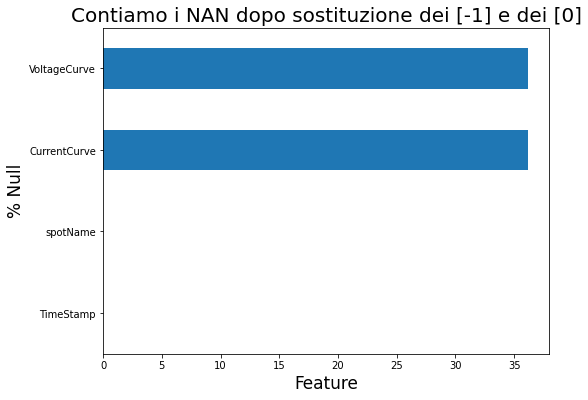

In [12]:
# le percentuali di Nan per feature aumentano rispetto a prima
plot_custom(null_per_features, 'barh',
            'Contiamo i NAN dopo sostituzione dei [-1] e dei [0]', '% Null', 'Feature')

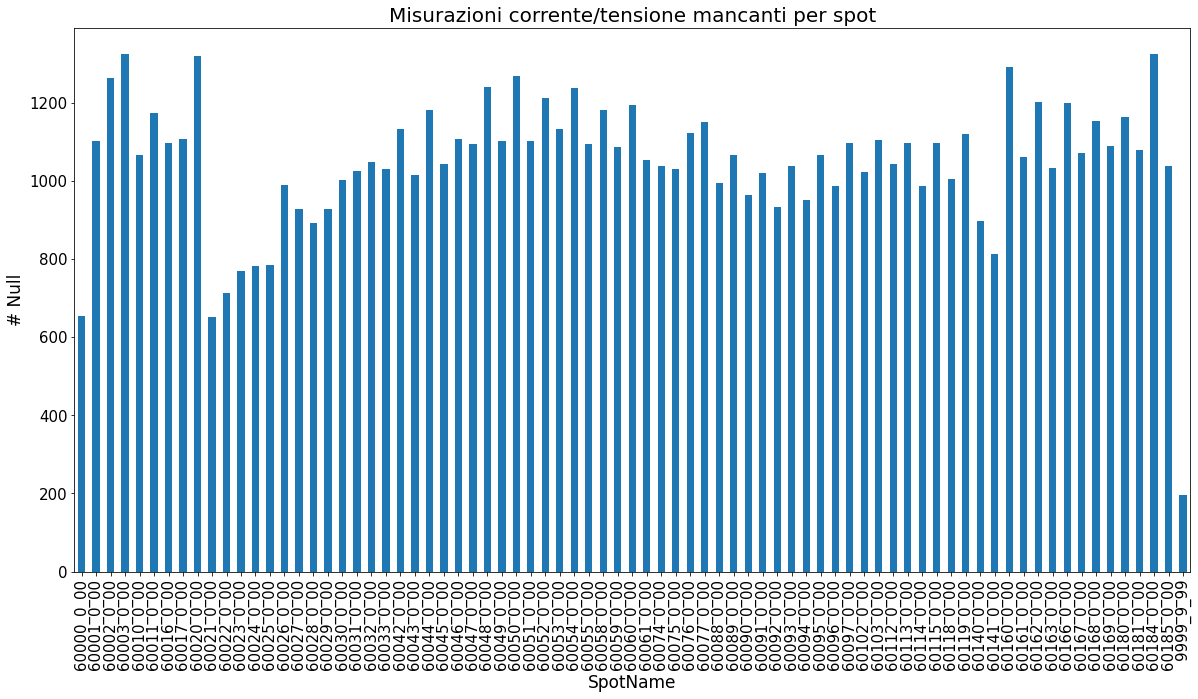

In [13]:
null_per_spot = dataset.CurrentCurve.isnull().groupby(
    [dataset['spotName']]).sum().astype(int)

plot_custom(null_per_spot, 'bar', 'Misurazioni corrente/tensione mancanti per spot',
            '# Null', 'SpotName', plot_size=(20, 10), tick_size=15)

Contiamo i null nella colonna CurrentCurve per ogni SPOTNAME (IN TOTALE) considerando i soli timestamp di cui abbiamo le misurazioni.

In [14]:
def check_na_misurazioni(dataset, column):
    # conterrà una lista di tuple (nome spot, num. null) -> null è None o -1
    spot_current_null = []
    for name in tqdm(dataset.spotName.unique()):
        # non considero gli spot senza misurazioni
        temp = dataset[(dataset.spotName == name) & ~(
            dataset.CurrentCurve.isna())][['spotName', column]]
        count_nan = 0
        for values in temp.iterrows():
            # conto i nan per ogni spotname
            count_nan += sum([1 for val in values[1][1] if val in (None, -1)])
            spot_current_null.append((name, count_nan))
    return pd.DataFrame.from_records(spot_current_null, columns=['spotName', f'Nan_{column}'],
                                     index='spotName')

In [15]:
nan_spot_currentcurve = check_na_misurazioni(dataset, 'CurrentCurve')

# currentcurve non contiene né None né -1 -> I nan sono 0 per ogni spotname
(nan_spot_currentcurve['Nan_CurrentCurve'] == 0).all()

100%|███████████████████████████████████████████████████████████████████████| 77/77 [00:18<00:00,  4.25it/s]


True

In [16]:
nan_spot_voltagecurve = check_na_misurazioni(dataset, 'VoltageCurve')

# voltagecurve non contiene né None né -1
(nan_spot_voltagecurve['Nan_VoltageCurve'] == 0).all()

100%|███████████████████████████████████████████████████████████████████████| 77/77 [00:11<00:00,  6.61it/s]


True

In [17]:
err_current = 0
err_voltage = 0

# verifichiamo che ogni misurazione non contenga typo ma solo numeri
for row in dataset[~dataset.CurrentCurve.isna()][['CurrentCurve', 'VoltageCurve']].iterrows():
    err_current += sum([1 for value in row[1].CurrentCurve if not isinstance(value, int)])
    err_voltage += sum([1 for value in row[1].VoltageCurve if not isinstance(value, int)])
print(
    f"# di valori non numerici in CurrentCurve = {err_current}\n# di valori non numerici in VoltageCurve = {err_voltage}")

# di valori non numerici in CurrentCurve = 0
# di valori non numerici in VoltageCurve = 0


In [18]:
# drop dei nan
dataset.dropna(inplace=True)

Notiamo come i punti di saldatura differiscono nel numero di saldature.<br />
Il numero di saldature per punto va da un minimo di 724 a un max di 2925.

In [19]:
welding_spots = dataset.groupby('spotName')['TimeStamp']
welding_spots.nunique().describe()

count      77.000000
mean     1843.779221
std       207.108580
min       532.000000
25%      1762.000000
50%      1842.000000
75%      1901.000000
max      2298.000000
Name: TimeStamp, dtype: float64

Calcoliamo durata media in MS di ogni saldatura per spotName.<br/>
Durata media saldatura per spotName = (MS_TOTALI_SALDATURA) / (N. DI SALDATURE X SPOT)

In [20]:

# se non abbiamo la misurazione non lo contiamo
spot_average_ms = []
for name in tqdm(dataset.spotName.unique()):
    count_ms_totali = 0
    lista_saldature_spot = dataset[(dataset.spotName == name) &
                                   ~(dataset.CurrentCurve.isna())]['CurrentCurve'].to_list()
    # sommiamo iterativamente la lunghezza di ogni saldatura x spot
    for saldatura in lista_saldature_spot:
        # lunghezza singola saldatura -> 1 step = 1ms
        count_ms_totali += len(saldatura)
    # len(lista_saldature_spot) corrisponde al # totale di saldature per spot
    spot_average_ms.append((name, count_ms_totali/len(lista_saldature_spot)))

100%|███████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 45.11it/s]


In [21]:
dataset_spot_average_ms = pd.DataFrame.from_records(spot_average_ms, columns=['spotName', 'Average_MS_CurrentCurve'],
                                                    index='spotName')
dataset_spot_average_ms

,Average_MS_CurrentCurve
spotName,
60061_0_00,410.728155
60075_0_00,411.172140
60141_0_00,400.000000
60163_0_00,411.200000
60161_0_00,408.565733
...,...
60180_0_00,415.897611
60047_0_00,409.529281
60044_0_00,415.940068


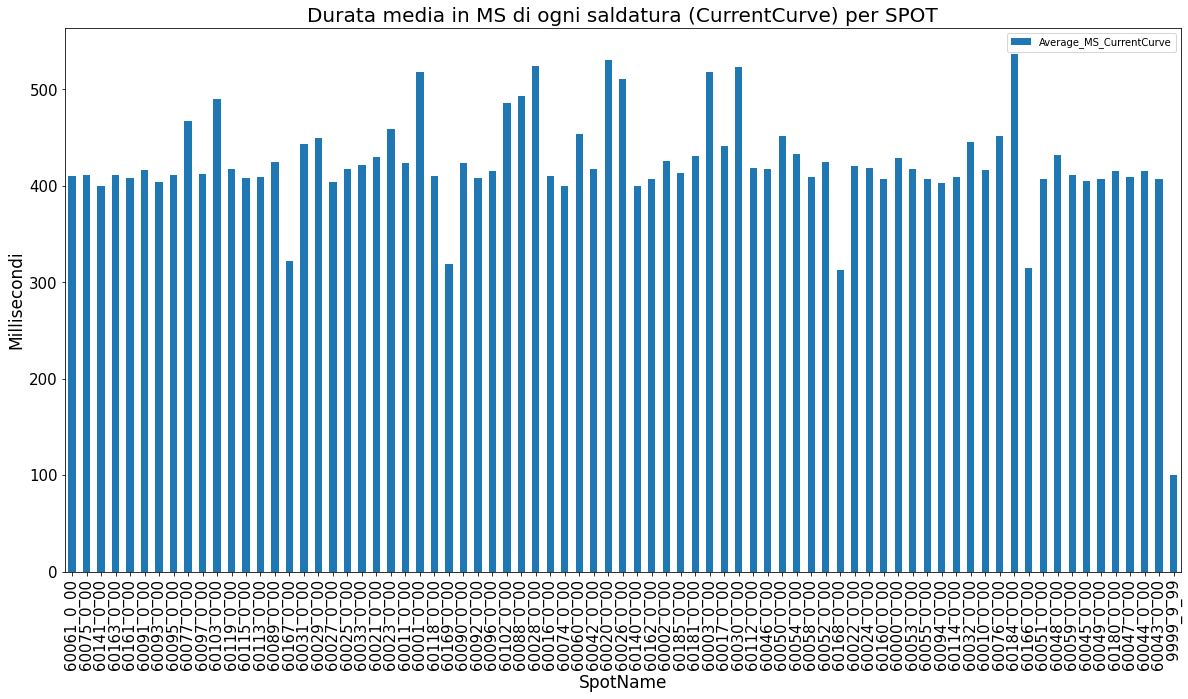

In [22]:
# notiamo come la durata media vari in base allo spot ed

plot_custom(dataset_spot_average_ms, 'bar', 'Durata media in MS di ogni saldatura (CurrentCurve) per SPOT',
            'Millisecondi', 'SpotName', plot_size=(20, 10), tick_size=15)

In [23]:
spot_average_ms = []
for name in tqdm(dataset.spotName.unique()):
    count_ms_totali = 0
    lista_saldature_spot = dataset[(dataset.spotName == name) &
                                   ~(dataset.VoltageCurve.isna())]['VoltageCurve'].to_list()
    # sommiamo iterativamente la lunghezza di ogni saldatura x spot
    for saldatura in lista_saldature_spot:
        # lunghezza singola saldatura -> 1 step = 1ms
        count_ms_totali += len(saldatura)
    # len(lista_saldature_spot) corrisponde al # totale di saldature per spot
    spot_average_ms.append((name, count_ms_totali/len(lista_saldature_spot)))

100%|███████████████████████████████████████████████████████████████████████| 77/77 [00:01<00:00, 44.13it/s]


In [24]:
# durata media saldatura x spot in millisecondi (MS)
dataset_spot_average_ms = pd.DataFrame.from_records(spot_average_ms, columns=['spotName', 'Average_MS_VoltageCurve'],
                                                    index='spotName')
dataset_spot_average_ms

,Average_MS_VoltageCurve
spotName,
60061_0_00,410.728155
60075_0_00,411.172140
60141_0_00,400.000000
60163_0_00,411.200000
60161_0_00,408.565733
...,...
60180_0_00,415.897611
60047_0_00,409.529281
60044_0_00,415.940068


La lunghezza media delle saldature x spot della colonna VoltageCurve è identica a quella della colonna CurrentCurve.<br/>
Possiamo ipotizzare dunque che nello stesso ms, non ci siano stati problemi nell'acquisire entrambe le misure. Ricordo che abbiamo già accertato che nessuna saldatura ha None o typo al suo interno. <br/>
Si suppone dunque che il sistema di acquisizione dati apparentemente funzioni.

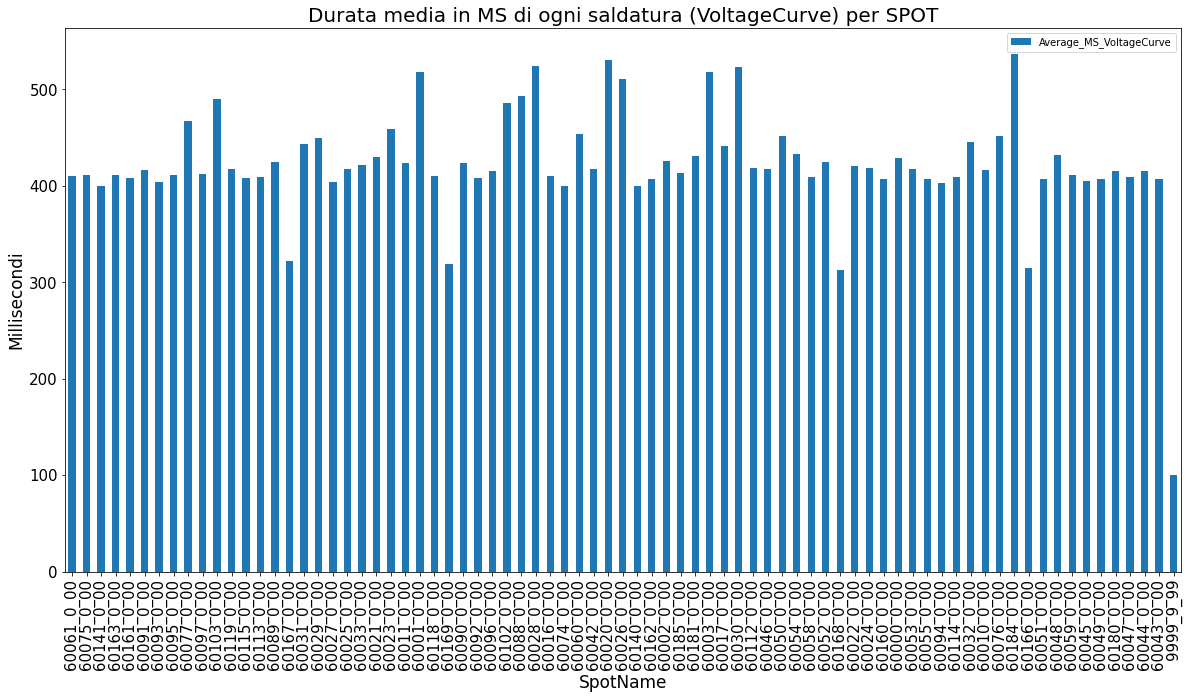

In [25]:
# Sapere che le liste in voltagecurve e currentcurve hanno la stessa dimensione ci permette di
# evitare di avere problemi nel momento in cui esplodiamo tale lista (creando timestamp di 1 ms di differenza)

plot_custom(dataset_spot_average_ms, 'bar', 'Durata media in MS di ogni saldatura (VoltageCurve) per SPOT',
            'Millisecondi', 'SpotName', plot_size=(20, 10), tick_size=15)

# Creazione del sample che verrà utilizzato in fase di testing

In [26]:
list_all_spotname = dataset.spotName.to_list()
c = Counter(list_all_spotname)
list_global_proportion = [
    (i, c[i] / len(list_all_spotname) * 100.0) for i in c]
list_global_proportion

[('60061_0_00', 1.3037607943517764),
 ('60075_0_00', 1.3276701077325532),
 ('60141_0_00', 1.4880031504036455),
 ('60163_0_00', 1.3255604624342494),
 ('60161_0_00', 1.3051672245506456),
 ('60091_0_00', 1.3255604624342494),
 ('60093_0_00', 1.3220443869370764),
 ('60095_0_00', 1.29672864335743),
 ('60077_0_00', 1.2320328542094456),
 ('60097_0_00', 1.2756321903743917),
 ('60103_0_00', 1.280554696070434),
 ('60119_0_00', 1.2742257601755225),
 ('60115_0_00', 1.2826643413687377),
 ('60113_0_00', 1.2735225450760879),
 ('60089_0_00', 1.311496160445557),
 ('60167_0_00', 1.3037607943517764),
 ('60031_0_00', 1.338921549323507),
 ('60029_0_00', 1.4022109082726224),
 ('60027_0_00', 1.4134623498635763),
 ('60025_0_00', 1.512615678883857),
 ('60033_0_00', 1.3375151191246377),
 ('60021_0_00', 1.6209108041967877),
 ('60023_0_00', 1.5280864110714185),
 ('60011_0_00', 1.2355489297066187),
 ('60001_0_00', 1.3037607943517764),
 ('60118_0_00', 1.3325926134285955),
 ('60169_0_00', 1.2925093527608225),
 ('6009

In [27]:
# percentuale dimensione campione rispetto alla dimensione della popolazione
sample_percentage_population = 0.01
sample = dataset.groupby('spotName', group_keys=False).apply(
    lambda x: x.sample(frac=sample_percentage_population, random_state = RANDOM_SEED))
list_sample_spotname = sample.spotName.to_list()
c = Counter(list_sample_spotname)
list_sample_proportion = [
    (i, c[i] / len(list_sample_spotname) * 100.0) for i in c]
list_sample_proportion

# Le percentuali sono uguali, quindi il nostro campione segue le stesse proporzioni presenti nella popolazione

[('60000_0_00', 1.6129032258064515),
 ('60001_0_00', 1.332398316970547),
 ('60002_0_00', 1.1921458625525947),
 ('60003_0_00', 1.1220196353436185),
 ('60010_0_00', 1.332398316970547),
 ('60011_0_00', 1.262272089761571),
 ('60016_0_00', 1.262272089761571),
 ('60017_0_00', 1.262272089761571),
 ('60020_0_00', 1.1220196353436185),
 ('60021_0_00', 1.6129032258064515),
 ('60022_0_00', 1.5427769985974753),
 ('60023_0_00', 1.5427769985974753),
 ('60024_0_00', 1.5427769985974753),
 ('60025_0_00', 1.5427769985974753),
 ('60026_0_00', 1.402524544179523),
 ('60027_0_00', 1.402524544179523),
 ('60028_0_00', 1.4726507713884993),
 ('60029_0_00', 1.402524544179523),
 ('60030_0_00', 1.402524544179523),
 ('60031_0_00', 1.332398316970547),
 ('60032_0_00', 1.332398316970547),
 ('60033_0_00', 1.332398316970547),
 ('60042_0_00', 1.262272089761571),
 ('60043_0_00', 1.332398316970547),
 ('60044_0_00', 1.262272089761571),
 ('60045_0_00', 1.262272089761571),
 ('60046_0_00', 1.262272089761571),
 ('60047_0_00', 1.

# CurrentCurve e VoltageCurve forniscono la stessa informazione?

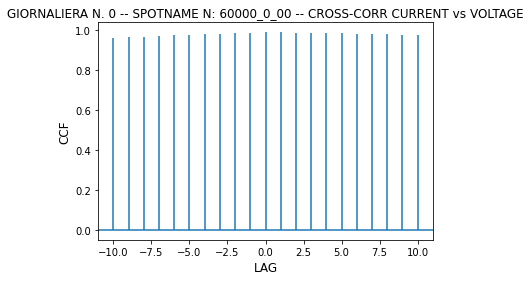

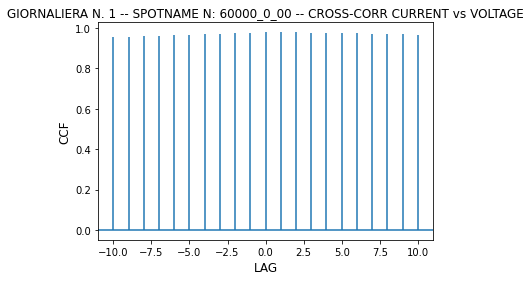

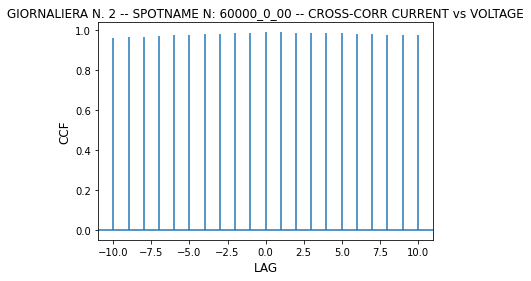

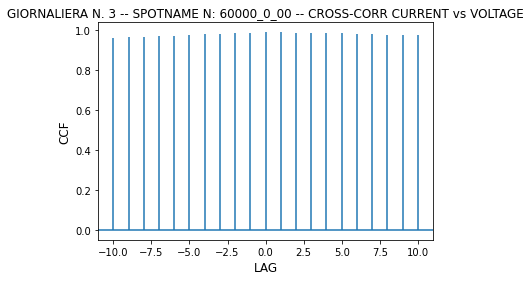

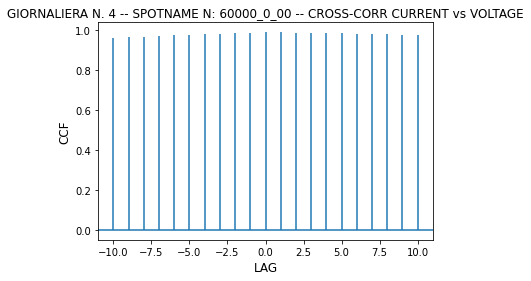

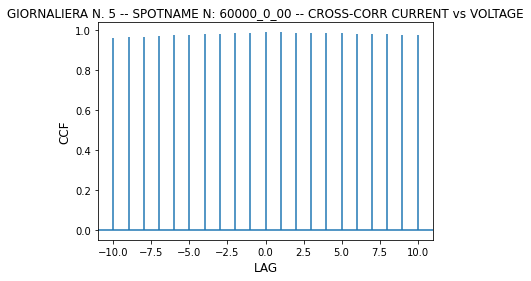

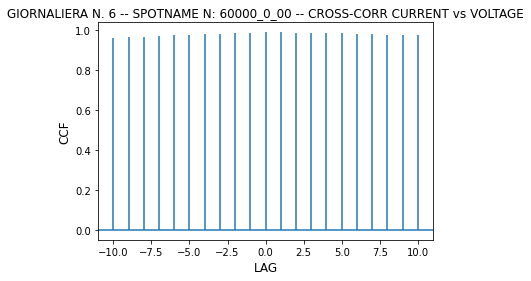

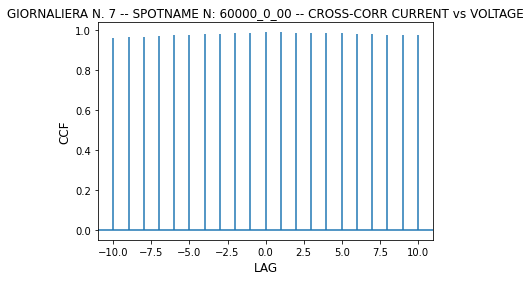

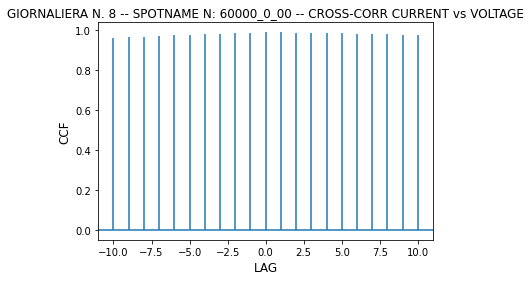

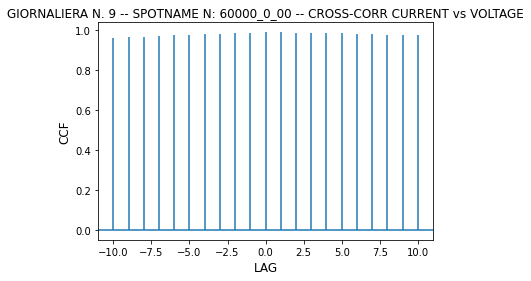

In [28]:
# VISUALIZZAZIONE GRAFICA CCF -- CURRENTCURVE VS VOLTAGECURVE
# per ogni misurazione giornaliera restituisco in output la CCF minore con lag 10 -> rimanere sempre alta
ccf_to_show = 10
n_lag = 10
for i, (index_DF, row) in enumerate(sample.iterrows()):
    if i == ccf_to_show:
        break
    cc = np.array(row['CurrentCurve'], dtype='float')
    vc = np.array(row['VoltageCurve'], dtype='float')
    ccf = plt.xcorr(cc, vc, usevlines=True, maxlags=n_lag)
    plt.title(
        f"GIORNALIERA N. {i} -- SPOTNAME N: {row['spotName']} -- CROSS-CORR CURRENT vs VOLTAGE")
    plt.xlabel("LAG", fontsize=12)
    plt.ylabel("CCF", fontsize=12)
    plt.show()

Notiamo come il valore minimo di cross-correlation tra la curva CurrentCurve e la curva VoltageCurve per ogni spotname, impostando 10 come valore di lag da analizzare di default, sia sempre alto.<br/>
Inoltre le due feature sono legate da un rapporto di dipendenza descritto dalla legge di Ohm: $V=I \times R$<br/>
Per alleggerire il carico computazionale decidiamo di non considerare la colonna VoltageCurve.

In [29]:
# per ogni misurazione giornaliera restituisco in output la CCF minore con lag 10 -> rimanere sempre alta
print("CROSS-CORRELATION CURRENT VS VOLTAGE -- MISURAZIONI GIORNALIERE\n")
for i, (index, row) in enumerate(sample.iterrows()):
    cc = np.array(row['CurrentCurve'], dtype='float')
    vc = np.array(row['VoltageCurve'], dtype='float')
    ccf = plt.xcorr(cc, vc, usevlines=True, maxlags=n_lag)[1]
    plt.clf()
    print(f"TOT. GIORNALIERA N. {i} -- SPOTNAME N: {row['spotName']} -- MIN. CCF: {min(ccf)}")

CROSS-CORRELATION CURRENT VS VOLTAGE -- MISURAZIONI GIORNALIERE

TOT. GIORNALIERA N. 0 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9604590451611745
TOT. GIORNALIERA N. 1 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9551967423077315
TOT. GIORNALIERA N. 2 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9623489604007216
TOT. GIORNALIERA N. 3 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9620476876412206
TOT. GIORNALIERA N. 4 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.960995917061052
TOT. GIORNALIERA N. 5 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9613443968594135
TOT. GIORNALIERA N. 6 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9628853827958379
TOT. GIORNALIERA N. 7 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9619144150023117
TOT. GIORNALIERA N. 8 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9600352073497865
TOT. GIORNALIERA N. 9 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.963506402783905
TOT. GIORNALIERA N. 10 -- SPOTNAME N: 60000_0_00 -- MIN. CCF: 0.9628848494913119
TOT. GIORNALIERA N. 11 -- SPOTNAME N: 60000_0_00 -- MIN.

TOT. GIORNALIERA N. 101 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.965287632474823
TOT. GIORNALIERA N. 102 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9646297276030985
TOT. GIORNALIERA N. 103 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9660177910519545
TOT. GIORNALIERA N. 104 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9641497383204904
TOT. GIORNALIERA N. 105 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.966309063395545
TOT. GIORNALIERA N. 106 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9547232395467035
TOT. GIORNALIERA N. 107 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9650316153355073
TOT. GIORNALIERA N. 108 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9634900130862878
TOT. GIORNALIERA N. 109 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9651479228959993
TOT. GIORNALIERA N. 110 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9653646871705485
TOT. GIORNALIERA N. 111 -- SPOTNAME N: 60011_0_00 -- MIN. CCF: 0.9646752646094593
TOT. GIORNALIERA N. 112 -- SPOTNAME N: 60016_0_00 -- MIN. CCF: 0.9606104715449949
TOT. GIORNALIERA N

TOT. GIORNALIERA N. 204 -- SPOTNAME N: 60022_0_00 -- MIN. CCF: 0.9557147652044125
TOT. GIORNALIERA N. 205 -- SPOTNAME N: 60022_0_00 -- MIN. CCF: 0.9497818919929589
TOT. GIORNALIERA N. 206 -- SPOTNAME N: 60022_0_00 -- MIN. CCF: 0.9534507956179478
TOT. GIORNALIERA N. 207 -- SPOTNAME N: 60022_0_00 -- MIN. CCF: 0.9535209142380315
TOT. GIORNALIERA N. 208 -- SPOTNAME N: 60022_0_00 -- MIN. CCF: 0.947196627910103
TOT. GIORNALIERA N. 209 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9580642464405231
TOT. GIORNALIERA N. 210 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9583468557098047
TOT. GIORNALIERA N. 211 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9519776866594802
TOT. GIORNALIERA N. 212 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9652033189550328
TOT. GIORNALIERA N. 213 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9530303062381164
TOT. GIORNALIERA N. 214 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9580672236561276
TOT. GIORNALIERA N. 215 -- SPOTNAME N: 60023_0_00 -- MIN. CCF: 0.9589224831165557
TOT. GIORNALIERA 

TOT. GIORNALIERA N. 305 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.961393234388787
TOT. GIORNALIERA N. 306 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9651318663613038
TOT. GIORNALIERA N. 307 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9625262727562807
TOT. GIORNALIERA N. 308 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9629612642773717
TOT. GIORNALIERA N. 309 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9641272974177455
TOT. GIORNALIERA N. 310 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9645618562930598
TOT. GIORNALIERA N. 311 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9634633696309365
TOT. GIORNALIERA N. 312 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9631495385417623
TOT. GIORNALIERA N. 313 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9620161885200547
TOT. GIORNALIERA N. 314 -- SPOTNAME N: 60027_0_00 -- MIN. CCF: 0.9629617059537038
TOT. GIORNALIERA N. 315 -- SPOTNAME N: 60028_0_00 -- MIN. CCF: 0.9622663018189789
TOT. GIORNALIERA N. 316 -- SPOTNAME N: 60028_0_00 -- MIN. CCF: 0.9658284776087182
TOT. GIORNALIERA 

TOT. GIORNALIERA N. 406 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9643276246655607
TOT. GIORNALIERA N. 407 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9631339155391468
TOT. GIORNALIERA N. 408 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9615061187593482
TOT. GIORNALIERA N. 409 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9663767653313047
TOT. GIORNALIERA N. 410 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9627079476581002
TOT. GIORNALIERA N. 411 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9618572429979666
TOT. GIORNALIERA N. 412 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9593875401867373
TOT. GIORNALIERA N. 413 -- SPOTNAME N: 60032_0_00 -- MIN. CCF: 0.9595963316385465
TOT. GIORNALIERA N. 414 -- SPOTNAME N: 60033_0_00 -- MIN. CCF: 0.9653119458381988
TOT. GIORNALIERA N. 415 -- SPOTNAME N: 60033_0_00 -- MIN. CCF: 0.9645772649880784
TOT. GIORNALIERA N. 416 -- SPOTNAME N: 60033_0_00 -- MIN. CCF: 0.9638636173296882
TOT. GIORNALIERA N. 417 -- SPOTNAME N: 60033_0_00 -- MIN. CCF: 0.9641760507371393
TOT. GIORNALIERA

TOT. GIORNALIERA N. 513 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9697033949272834
TOT. GIORNALIERA N. 514 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9697624504552016
TOT. GIORNALIERA N. 515 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9606006908671852
TOT. GIORNALIERA N. 516 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9694529686245309
TOT. GIORNALIERA N. 517 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.97053032723777
TOT. GIORNALIERA N. 518 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.969675886608792
TOT. GIORNALIERA N. 519 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9709314815849956
TOT. GIORNALIERA N. 520 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9680460341690857
TOT. GIORNALIERA N. 521 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9695456754643977
TOT. GIORNALIERA N. 522 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9711469542504405
TOT. GIORNALIERA N. 523 -- SPOTNAME N: 60046_0_00 -- MIN. CCF: 0.9700051965812198
TOT. GIORNALIERA N. 524 -- SPOTNAME N: 60047_0_00 -- MIN. CCF: 0.9695579496431281
TOT. GIORNALIERA N.

TOT. GIORNALIERA N. 614 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9704712451093277
TOT. GIORNALIERA N. 615 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9702681103003179
TOT. GIORNALIERA N. 616 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9696724544714648
TOT. GIORNALIERA N. 617 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9713224077114868
TOT. GIORNALIERA N. 618 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9708940932966643
TOT. GIORNALIERA N. 619 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9700800626202156
TOT. GIORNALIERA N. 620 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9710853156083201
TOT. GIORNALIERA N. 621 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9693977285016372
TOT. GIORNALIERA N. 622 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9717105859553791
TOT. GIORNALIERA N. 623 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9699282793955308
TOT. GIORNALIERA N. 624 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.971461162803732
TOT. GIORNALIERA N. 625 -- SPOTNAME N: 60052_0_00 -- MIN. CCF: 0.9673354309767629
TOT. GIORNALIERA 

TOT. GIORNALIERA N. 718 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9710510241570472
TOT. GIORNALIERA N. 719 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9685683203455723
TOT. GIORNALIERA N. 720 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.968351121088408
TOT. GIORNALIERA N. 721 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9661740551840593
TOT. GIORNALIERA N. 722 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9658595511086334
TOT. GIORNALIERA N. 723 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9670713193636695
TOT. GIORNALIERA N. 724 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9637717578379689
TOT. GIORNALIERA N. 725 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.968676394371298
TOT. GIORNALIERA N. 726 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9658494587111208
TOT. GIORNALIERA N. 727 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9641286091184251
TOT. GIORNALIERA N. 728 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9686210875593075
TOT. GIORNALIERA N. 729 -- SPOTNAME N: 60060_0_00 -- MIN. CCF: 0.9478832958977513
TOT. GIORNALIERA N

TOT. GIORNALIERA N. 820 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9713472280976334
TOT. GIORNALIERA N. 821 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9701404122090804
TOT. GIORNALIERA N. 822 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9707051573375032
TOT. GIORNALIERA N. 823 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.958693859059287
TOT. GIORNALIERA N. 824 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9644031779834168
TOT. GIORNALIERA N. 825 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9645121561617762
TOT. GIORNALIERA N. 826 -- SPOTNAME N: 60077_0_00 -- MIN. CCF: 0.9614665487291779
TOT. GIORNALIERA N. 827 -- SPOTNAME N: 60088_0_00 -- MIN. CCF: 0.9650954012363026
TOT. GIORNALIERA N. 828 -- SPOTNAME N: 60088_0_00 -- MIN. CCF: 0.9716504847986338
TOT. GIORNALIERA N. 829 -- SPOTNAME N: 60088_0_00 -- MIN. CCF: 0.970820509456159
TOT. GIORNALIERA N. 830 -- SPOTNAME N: 60088_0_00 -- MIN. CCF: 0.9662578678871532
TOT. GIORNALIERA N. 831 -- SPOTNAME N: 60088_0_00 -- MIN. CCF: 0.964880333565197
TOT. GIORNALIERA N.

TOT. GIORNALIERA N. 924 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9632176648374713
TOT. GIORNALIERA N. 925 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.961850880907173
TOT. GIORNALIERA N. 926 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9637561167799688
TOT. GIORNALIERA N. 927 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9632412887209052
TOT. GIORNALIERA N. 928 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9612209496017704
TOT. GIORNALIERA N. 929 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9627359626755633
TOT. GIORNALIERA N. 930 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9624550077097351
TOT. GIORNALIERA N. 931 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9622923327508494
TOT. GIORNALIERA N. 932 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9581520946059967
TOT. GIORNALIERA N. 933 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9618416269155827
TOT. GIORNALIERA N. 934 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.9630125043982546
TOT. GIORNALIERA N. 935 -- SPOTNAME N: 60093_0_00 -- MIN. CCF: 0.962734532263755
TOT. GIORNALIERA N

TOT. GIORNALIERA N. 1027 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.969578708625893
TOT. GIORNALIERA N. 1028 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9701915947790838
TOT. GIORNALIERA N. 1029 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9730155751183562
TOT. GIORNALIERA N. 1030 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9714873136654891
TOT. GIORNALIERA N. 1031 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9713127058726845
TOT. GIORNALIERA N. 1032 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9731807944214789
TOT. GIORNALIERA N. 1033 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9704834074790689
TOT. GIORNALIERA N. 1034 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9721195112856303
TOT. GIORNALIERA N. 1035 -- SPOTNAME N: 60102_0_00 -- MIN. CCF: 0.9713810000024042
TOT. GIORNALIERA N. 1036 -- SPOTNAME N: 60103_0_00 -- MIN. CCF: 0.9727093067486171
TOT. GIORNALIERA N. 1037 -- SPOTNAME N: 60103_0_00 -- MIN. CCF: 0.9723689558935659
TOT. GIORNALIERA N. 1038 -- SPOTNAME N: 60103_0_00 -- MIN. CCF: 0.9727704007706187
TOT. 

TOT. GIORNALIERA N. 1129 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9715645427238234
TOT. GIORNALIERA N. 1130 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9697565648585817
TOT. GIORNALIERA N. 1131 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9692749459879508
TOT. GIORNALIERA N. 1132 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9683866994140854
TOT. GIORNALIERA N. 1133 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9694491979944584
TOT. GIORNALIERA N. 1134 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9723971369174008
TOT. GIORNALIERA N. 1135 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9690903947095616
TOT. GIORNALIERA N. 1136 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.968651063873363
TOT. GIORNALIERA N. 1137 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9686842211664093
TOT. GIORNALIERA N. 1138 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9701328967150086
TOT. GIORNALIERA N. 1139 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9706136555189159
TOT. GIORNALIERA N. 1140 -- SPOTNAME N: 60118_0_00 -- MIN. CCF: 0.9697621294141064
TOT. 

TOT. GIORNALIERA N. 1232 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9713389842422058
TOT. GIORNALIERA N. 1233 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9730900721931044
TOT. GIORNALIERA N. 1234 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9732386939760426
TOT. GIORNALIERA N. 1235 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9689202147443131
TOT. GIORNALIERA N. 1236 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9726711938017996
TOT. GIORNALIERA N. 1237 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9731255936186332
TOT. GIORNALIERA N. 1238 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9721654134555358
TOT. GIORNALIERA N. 1239 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9728417089170214
TOT. GIORNALIERA N. 1240 -- SPOTNAME N: 60161_0_00 -- MIN. CCF: 0.9725083765916046
TOT. GIORNALIERA N. 1241 -- SPOTNAME N: 60162_0_00 -- MIN. CCF: 0.9661623874485471
TOT. GIORNALIERA N. 1242 -- SPOTNAME N: 60162_0_00 -- MIN. CCF: 0.9692088813256661
TOT. GIORNALIERA N. 1243 -- SPOTNAME N: 60162_0_00 -- MIN. CCF: 0.969467620954584
TOT. 

TOT. GIORNALIERA N. 1335 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9609252754107434
TOT. GIORNALIERA N. 1336 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9591472045094158
TOT. GIORNALIERA N. 1337 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9583019336163595
TOT. GIORNALIERA N. 1338 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9643009831653452
TOT. GIORNALIERA N. 1339 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9627461706084441
TOT. GIORNALIERA N. 1340 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9645861127341655
TOT. GIORNALIERA N. 1341 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.961990632356832
TOT. GIORNALIERA N. 1342 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9624388454528697
TOT. GIORNALIERA N. 1343 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9643648872436407
TOT. GIORNALIERA N. 1344 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.9632197710123805
TOT. GIORNALIERA N. 1345 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.966671332197986
TOT. GIORNALIERA N. 1346 -- SPOTNAME N: 60169_0_00 -- MIN. CCF: 0.961685767193783
TOT. GI

<Figure size 432x288 with 0 Axes>

In [30]:
count_len_diff = 0
# verifico che len currentcurve sia sempre uguale a len voltagecurve
for index, row in tqdm(dataset[~dataset.VoltageCurve.isna()].iterrows(), total=dataset[~dataset.VoltageCurve.isna()].shape[0]):
    l_current = len(row.CurrentCurve)
    l_voltage = len(row.VoltageCurve)
    if l_current != l_voltage:
        print(
            f"Index: {index} --- Len. CurrentCurve: {l_current} --- Len. VoltageCurve: {l_voltage}")
        count_len_diff += 1

# il risultato è 0, procediamo con l'unrolling delle liste
count_len_diff

100%|██████████████████████████████████████████████████████████████| 142204/142204 [02:28<00:00, 960.46it/s]


0

In [31]:
# Notiamo che punti di saldatura diversi hanno numeri di saldatura differenti nello stesso istante

test_data = dataset[~dataset.VoltageCurve.isna()]
# usiamo il numero di misurazioni presenti nella prima riga del dataset come termine di comparazione
first_length = len(test_data.iloc[1, 2])
# verifico che len currentcurve sia sempre uguale a len voltagecurve
for index, row in tqdm(test_data.iterrows(), total=test_data.shape[0]):
    l_current = len(row['CurrentCurve'])
    if first_length != l_current:
        print(test_data.iloc[1])
        print(row)
        print("\nLenghts diverge!")
        break

  0%|                                                                            | 0/142204 [00:00<?, ?it/s]

TimeStamp                                     2019-09-17 17:33:48
spotName                                               60075_0_00
CurrentCurve    [322, 2099, 3940, 5296, 6362, 7169, 7589, 7750...
VoltageCurve    [135, 749, 1256, 1534, 1698, 1777, 1748, 1648,...
Name: 75852, dtype: object
TimeStamp                                     2019-09-17 17:33:48
spotName                                               60061_0_00
CurrentCurve    [312, 2067, 3862, 5267, 6398, 7217, 7959, 8700...
VoltageCurve    [134, 756, 1292, 1623, 1812, 1876, 1946, 2010,...
Name: 0, dtype: object

Lenghts diverge!


In [32]:
# numero totale di sensori
len(dataset.spotName.unique())

77

In [33]:
# feature engineering
dataset['Date'] = dataset.TimeStamp.dt.date
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['TimeStamp'] = dataset['TimeStamp'].dt.time
dataset.rename(columns={'TimeStamp': 'Time'}, inplace=True)
dataset['n_week'] = dataset['Date'].dt.week
dataset = dataset[['spotName', 'Date',
                   'Time', 'n_week', 'CurrentCurve', 'VoltageCurve']]
dataset

C:\Users\danie\AppData\Local\Temp\ipykernel_9732\4114651777.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dataset['n_week'] = dataset['Date'].dt.week


,spotName,Date,Time,n_week,CurrentCurve,VoltageCurve
0,60061_0_00,2019-09-17,17:33:48,38,"[312, 2067, 3862, 5267, 6398, 7217, 7959, 8700...","[134, 756, 1292, 1623, 1812, 1876, 1946, 2010,..."
75852,60075_0_00,2019-09-17,17:33:48,38,"[322, 2099, 3940, 5296, 6362, 7169, 7589, 7750...","[135, 749, 1256, 1534, 1698, 1777, 1748, 1648,..."
75853,60141_0_00,2019-09-17,17:33:48,38,"[214, 1995, 3836, 5125, 6107, 6813, 7182, 7427...","[95, 696, 1217, 1495, 1686, 1759, 1723, 1686, ..."
75854,60163_0_00,2019-09-17,17:33:48,38,"[323, 2137, 4047, 5472, 6475, 7090, 7544, 7803...","[139, 767, 1298, 1598, 1745, 1766, 1779, 1724,..."
75855,60161_0_00,2019-09-17,17:33:48,38,"[327, 2161, 4126, 5468, 6483, 7237, 7662, 7793...","[135, 763, 1263, 1534, 1677, 1748, 1705, 1627,..."
...,...,...,...,...,...,...
222862,60021_0_00,2020-05-28,15:00:04,22,"[317, 2095, 3809, 4984, 5714, 6222, 6698, 7110...","[138, 777, 1332, 1675, 1888, 2008, 2100, 2193,..."
222864,60025_0_00,2020-05-28,15:00:17,22,"[344, 2225, 4011, 5234, 6017, 6613, 7051, 7365...","[134, 763, 1284, 1602, 1779, 1863, 1946, 1972,..."
222865,60027_0_00,2020-05-28,15:00:17,22,"[303, 2034, 3644, 4767, 5526, 6103, 6437, 6680...","[136, 744, 1264, 1600, 1784, 1904, 1944, 1960,..."
222863,60023_0_00,2020-05-28,15:00:17,22,"[317, 2065, 3781, 4926, 5688, 6229, 6801, 7118...","[139, 769, 1303, 1652, 1853, 1976, 2107, 2142,..."


In [34]:
dataset.dtypes

spotName                object
Date            datetime64[ns]
Time                    object
n_week                   int64
CurrentCurve            object
VoltageCurve            object
dtype: object

## Quanti giorni ci mancano?

In [35]:
# abbiamo dal 17-09-2019 al 28-05-2020
dataset.Date.describe()

C:\Users\danie\AppData\Local\Temp\ipykernel_9732\1119642758.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset.Date.describe()


count                  142204
unique                     59
top       2020-01-15 00:00:00
freq                     5515
first     2019-09-17 00:00:00
last      2020-05-28 00:00:00
Name: Date, dtype: object

C:\Users\danie\AppData\Local\pypoetry\Cache\virtualenvs\industry-lab-JWw7CphW-py3.9\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


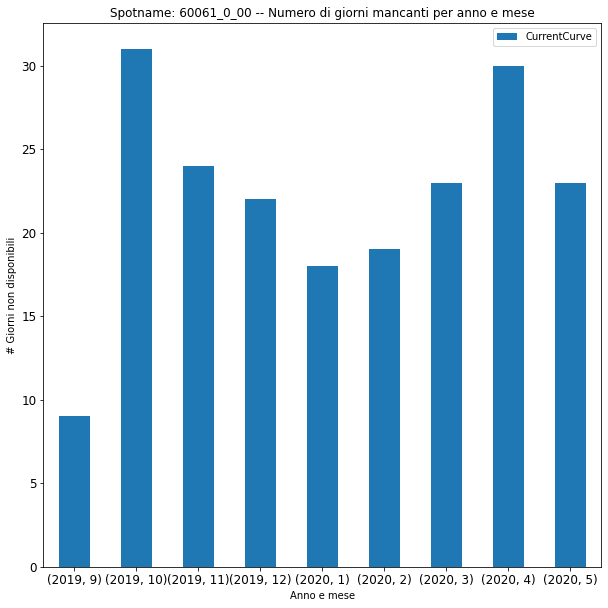

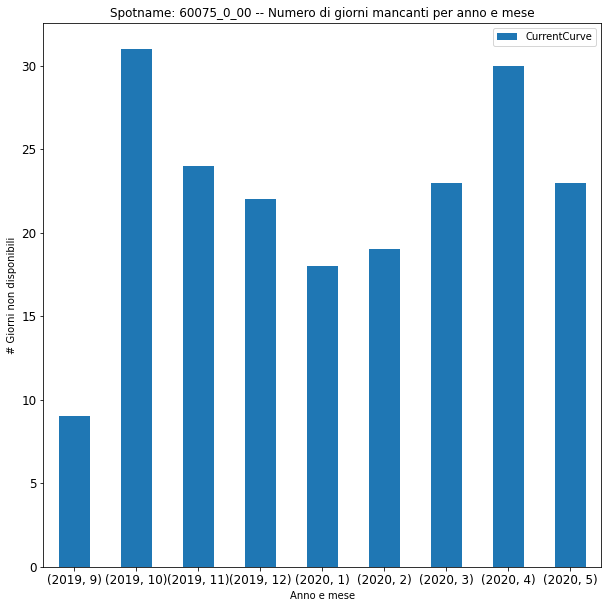

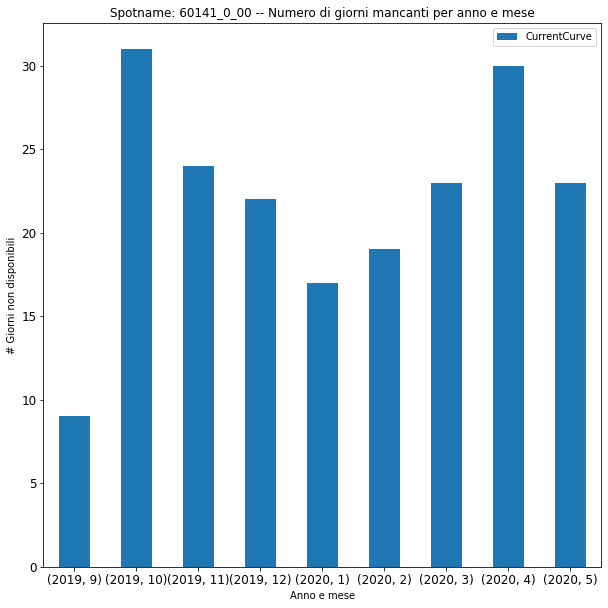

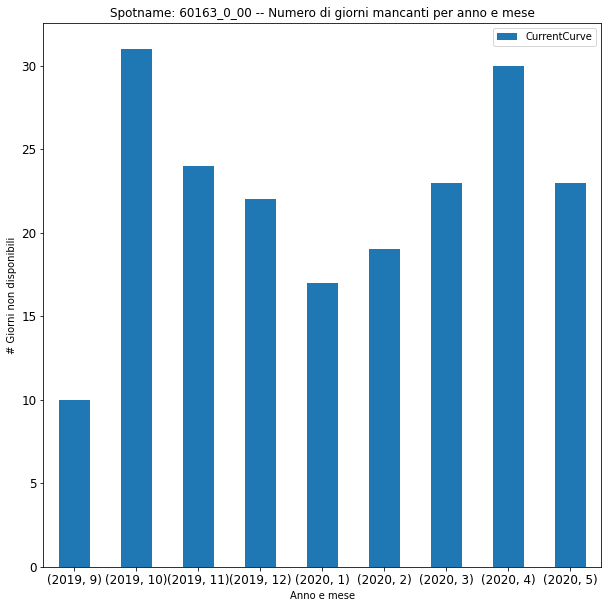

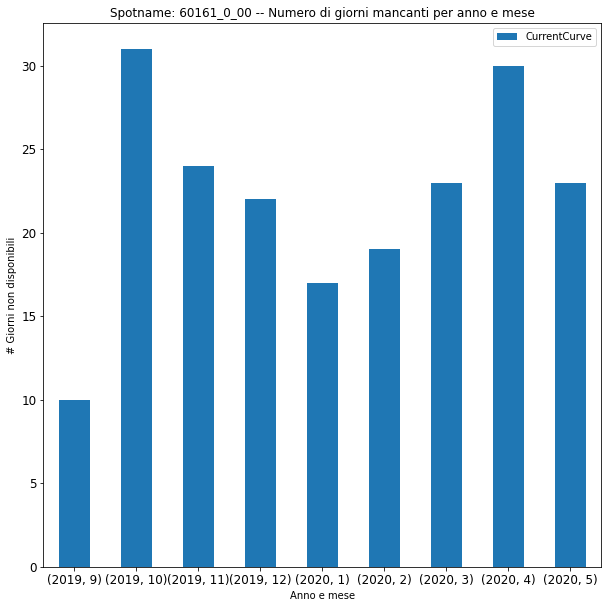

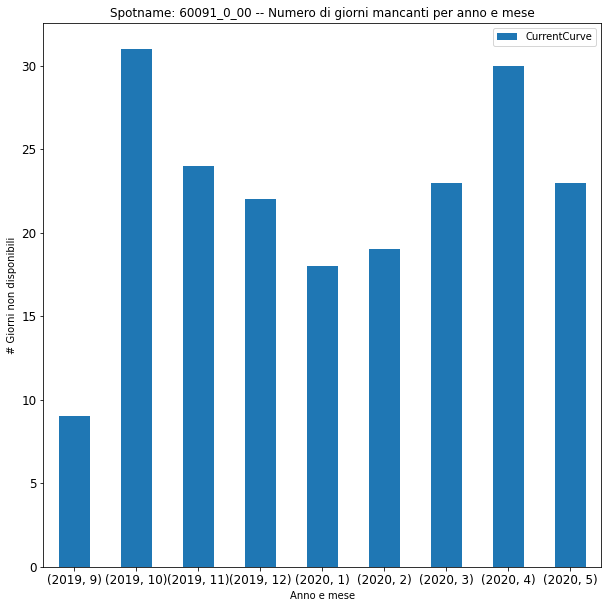

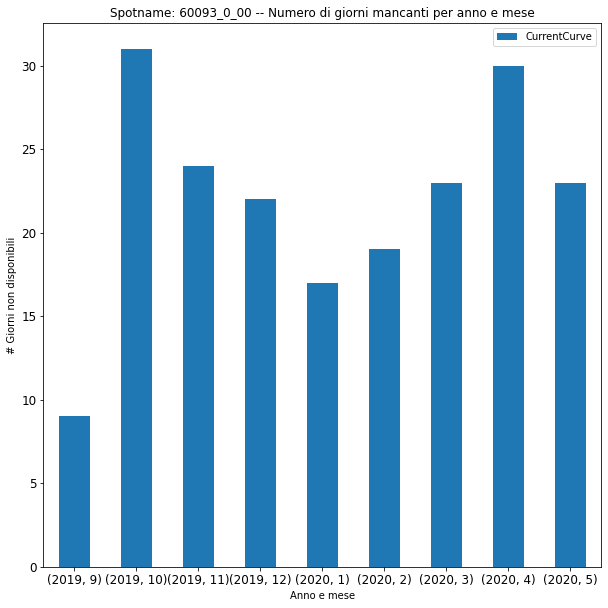

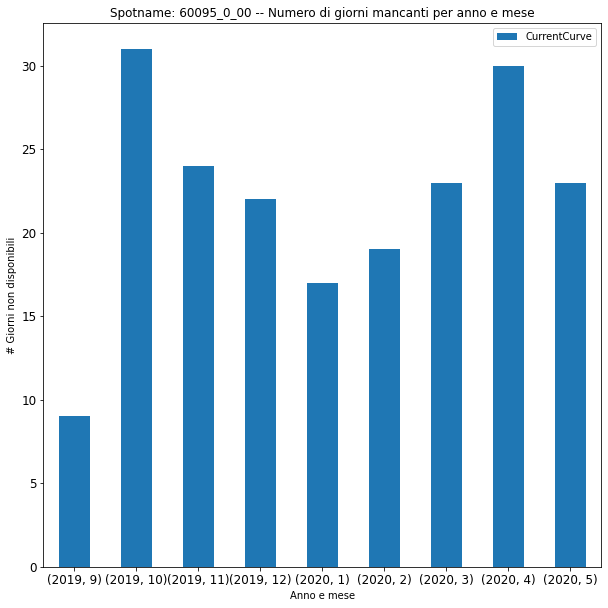

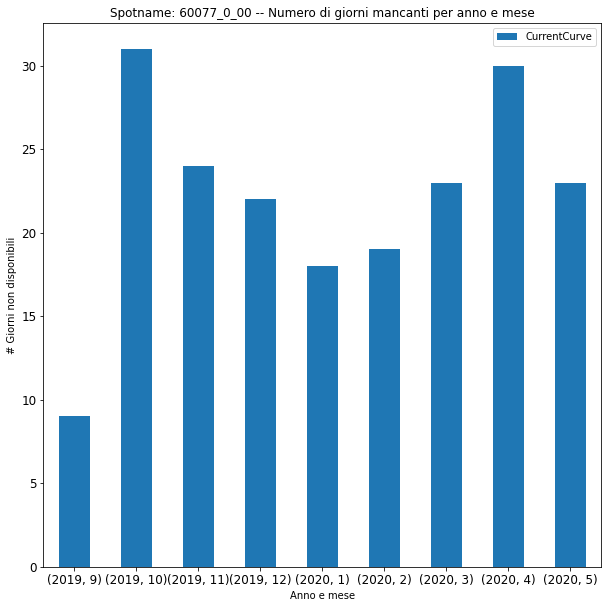

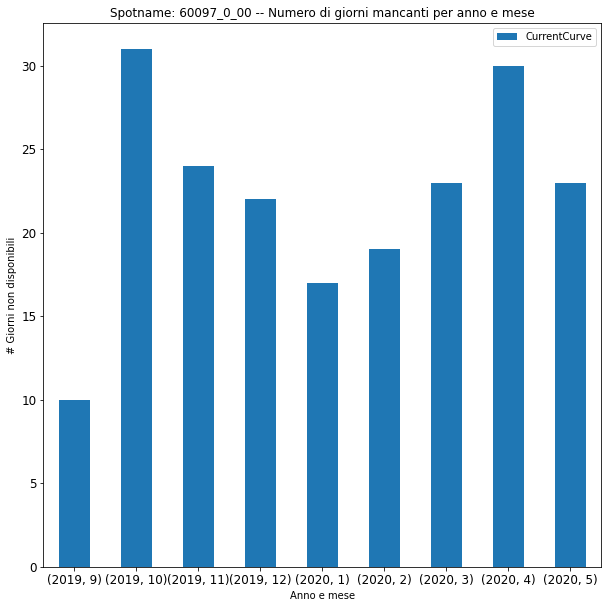

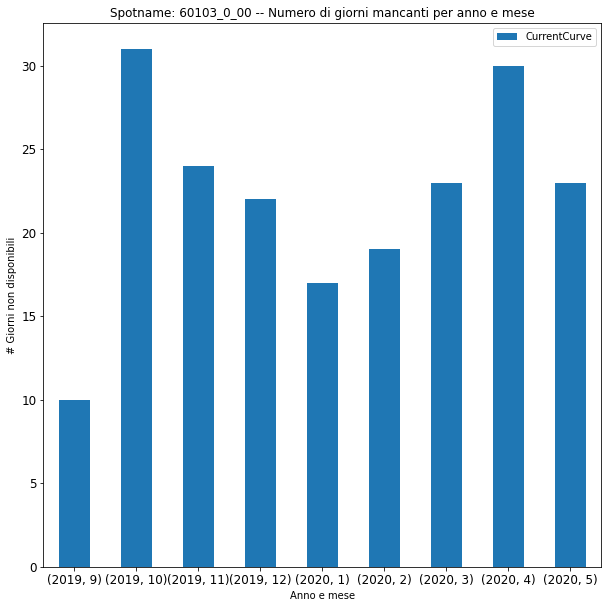

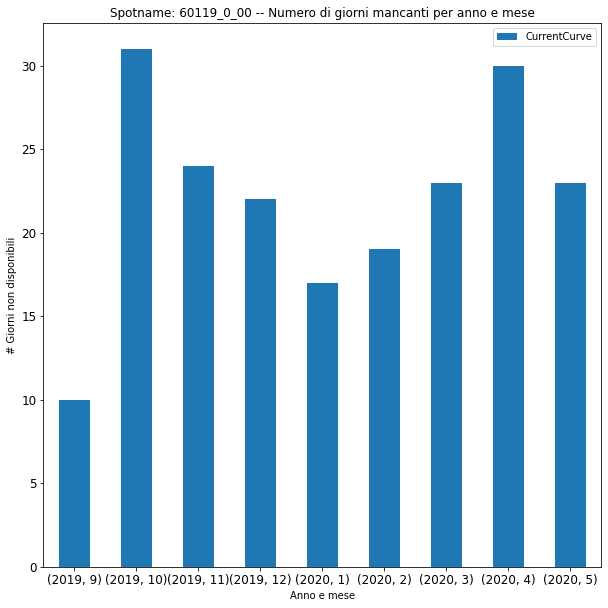

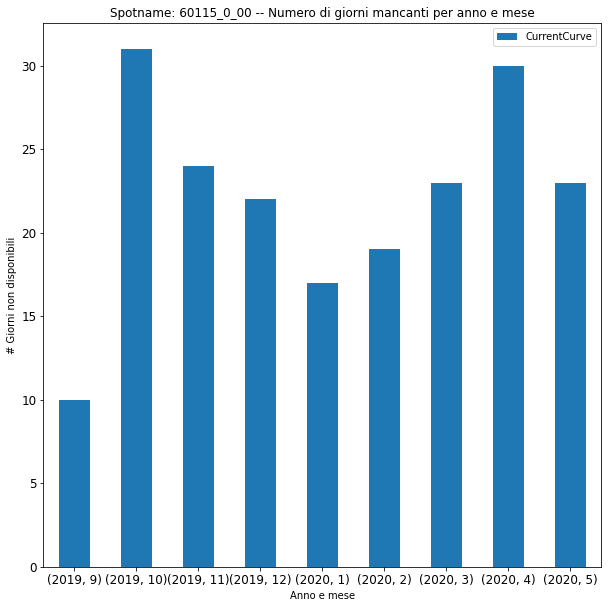

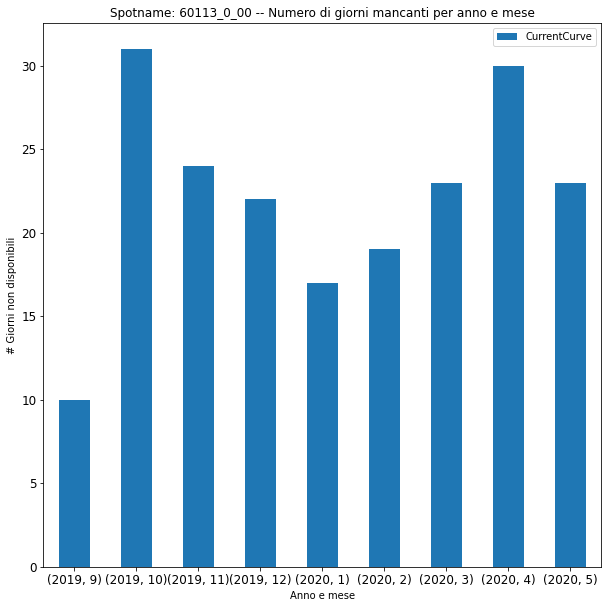

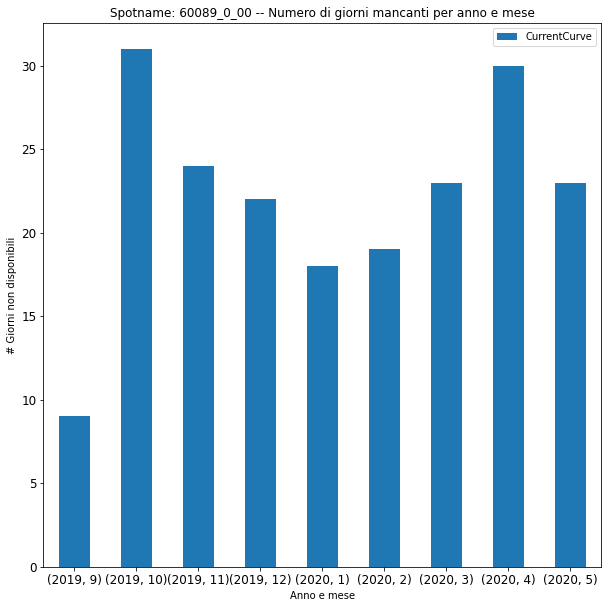

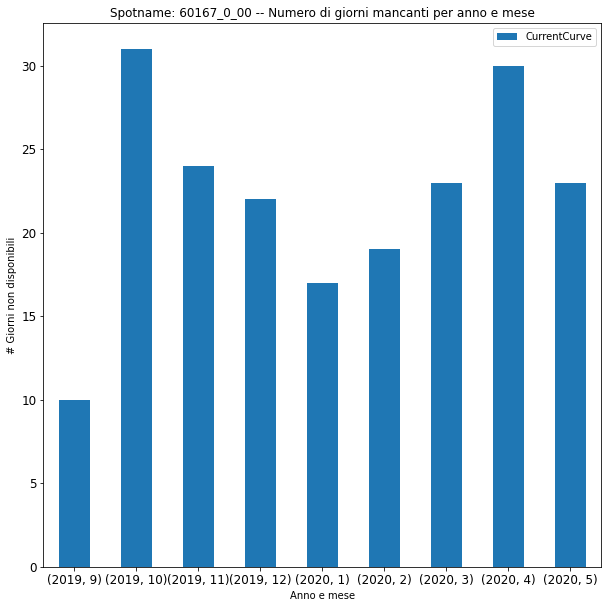

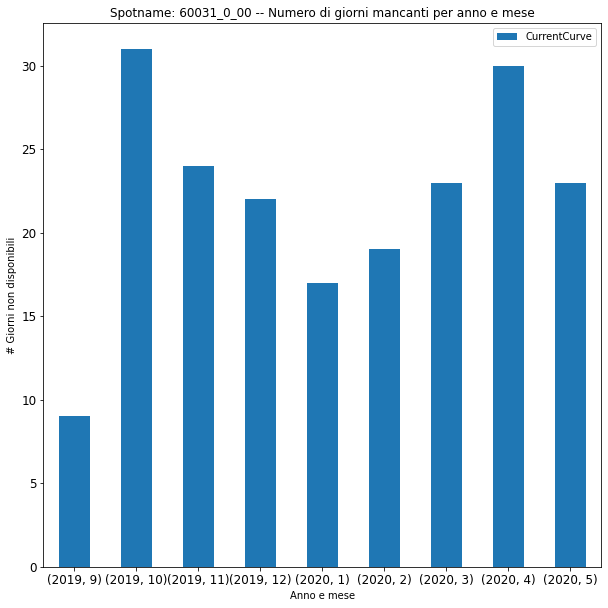

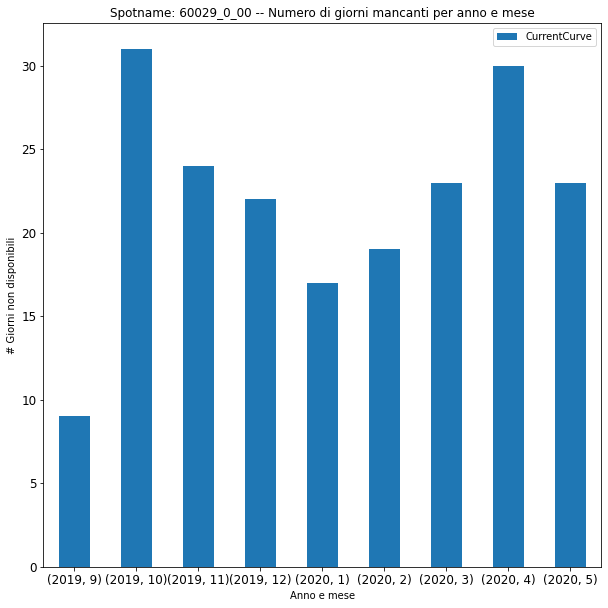

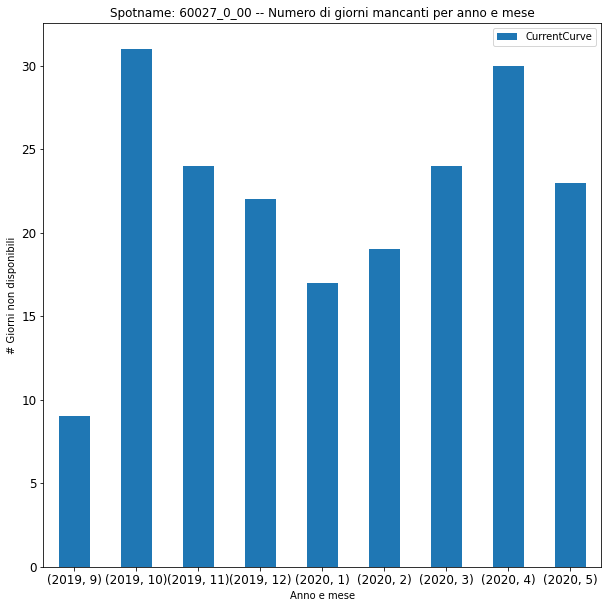

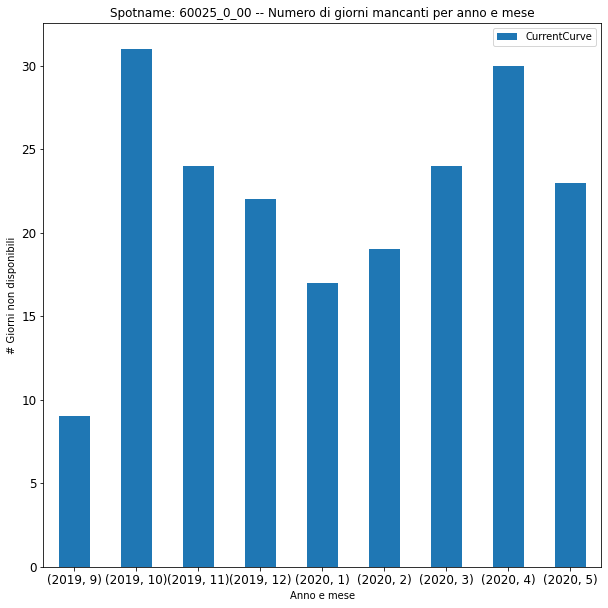

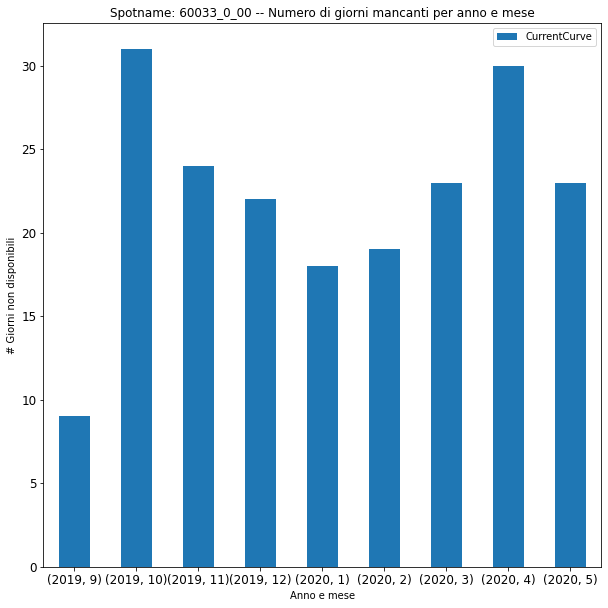

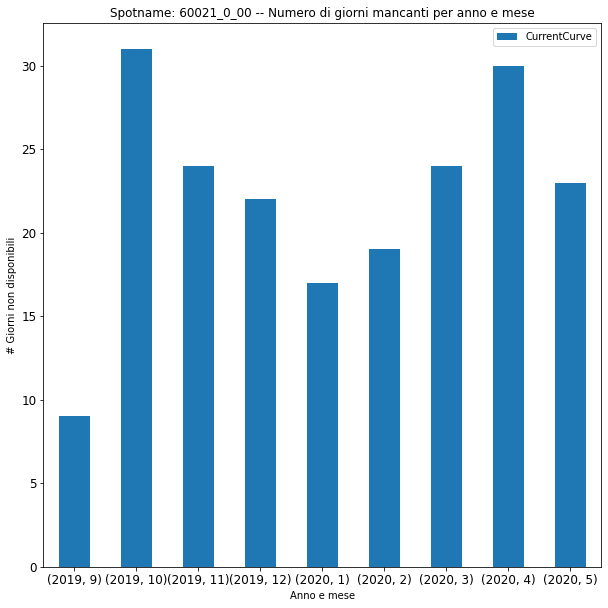

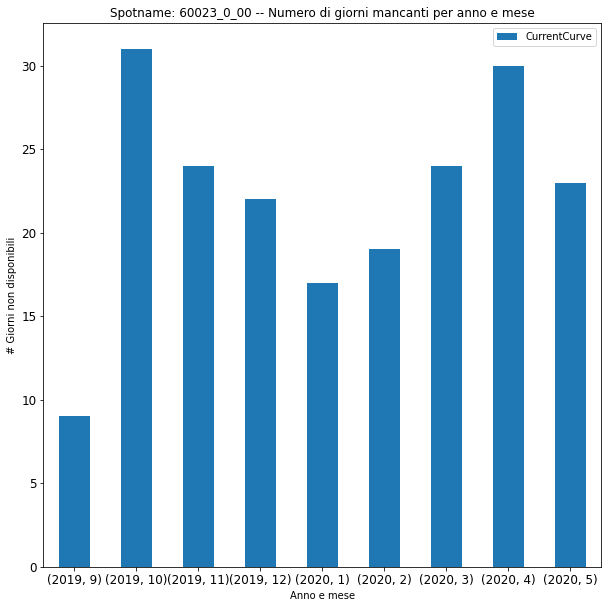

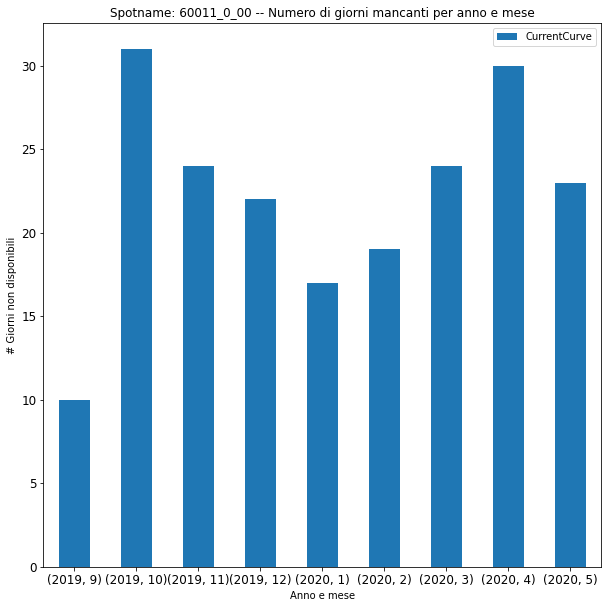

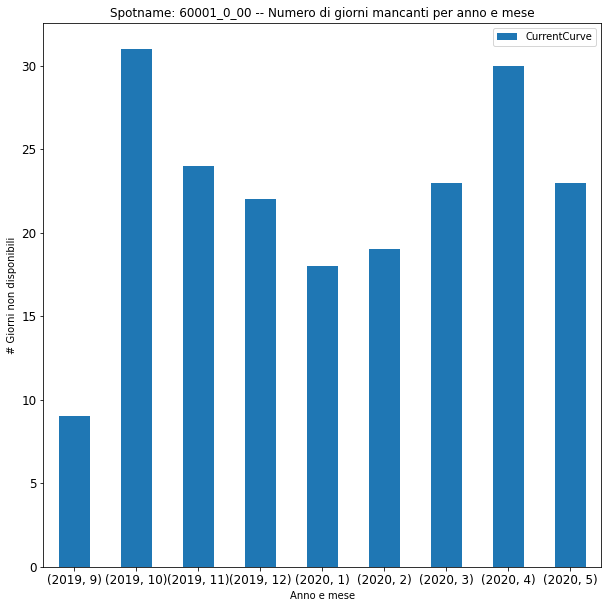

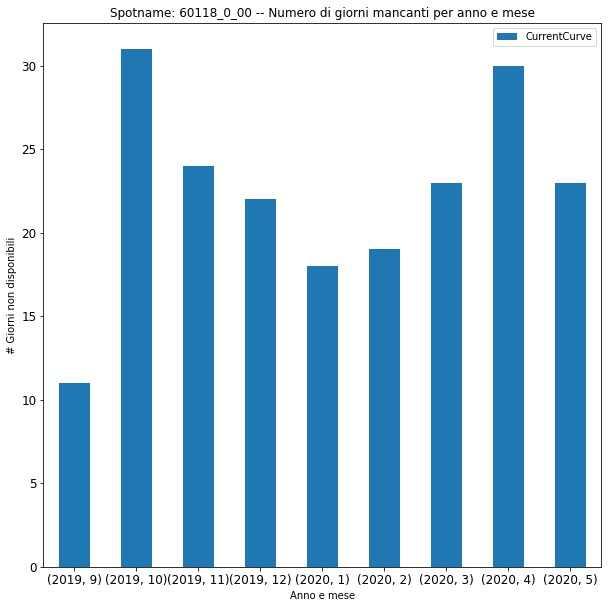

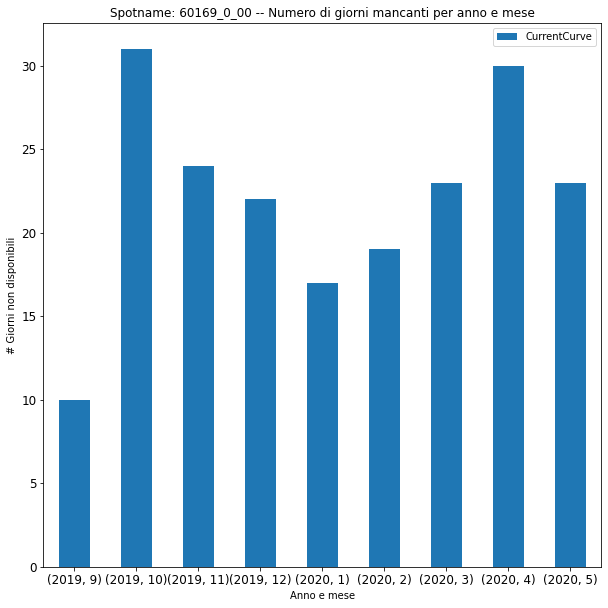

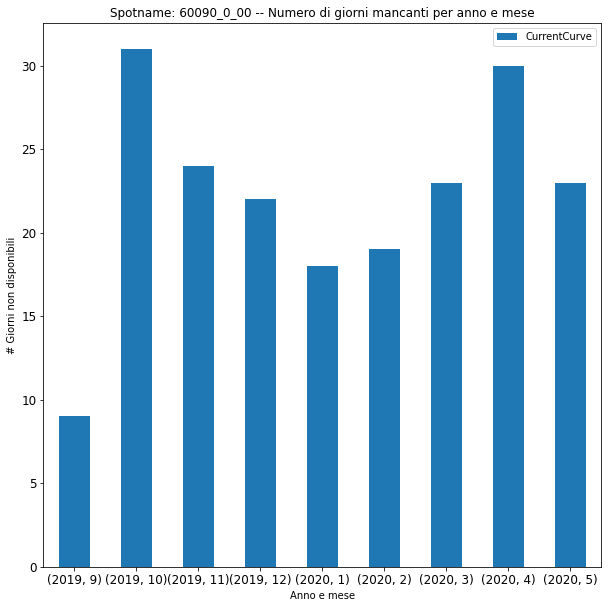

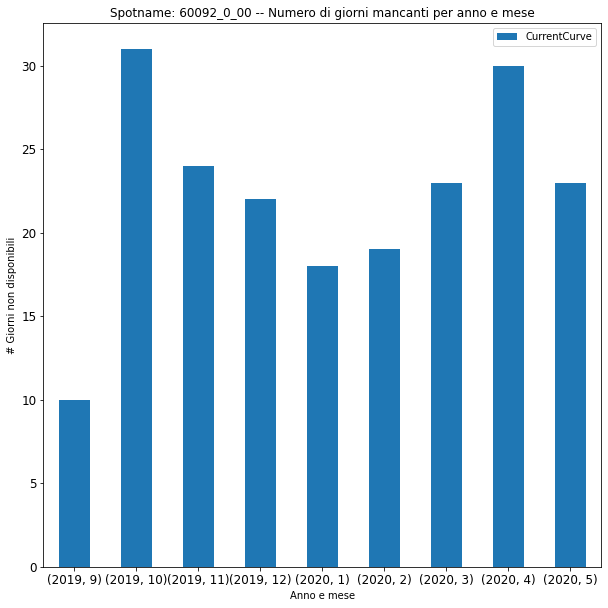

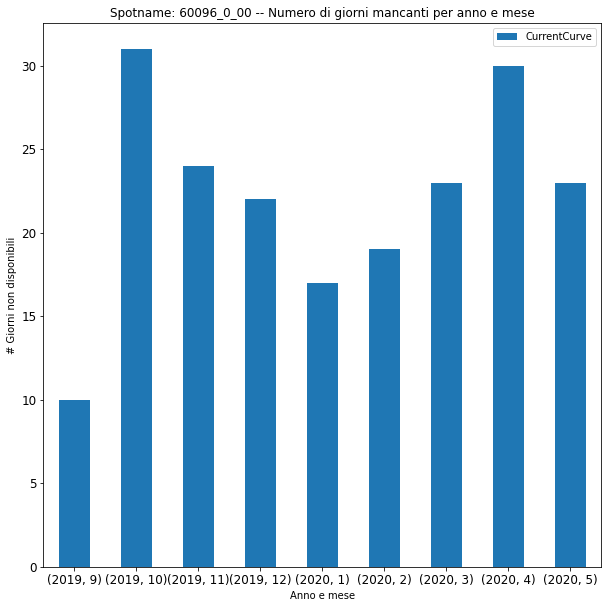

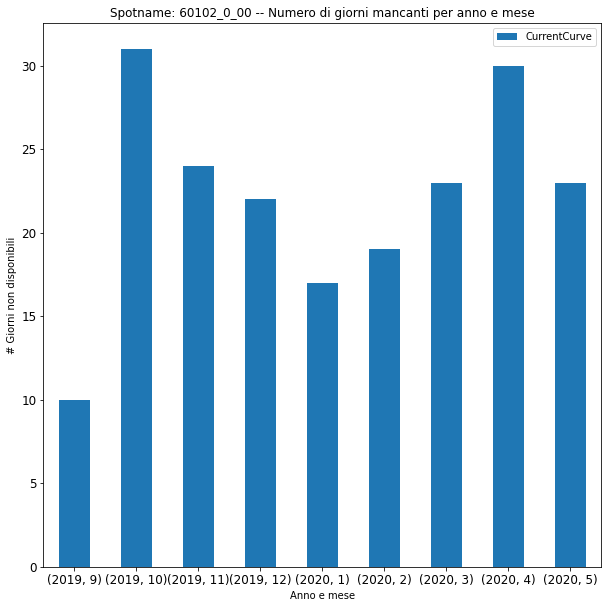

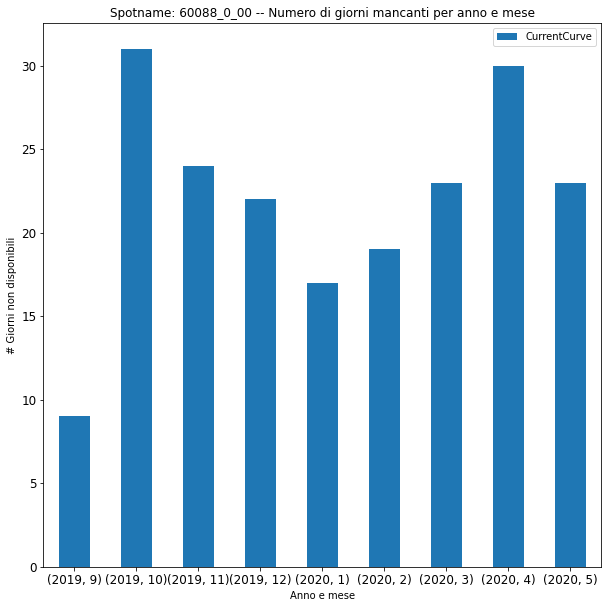

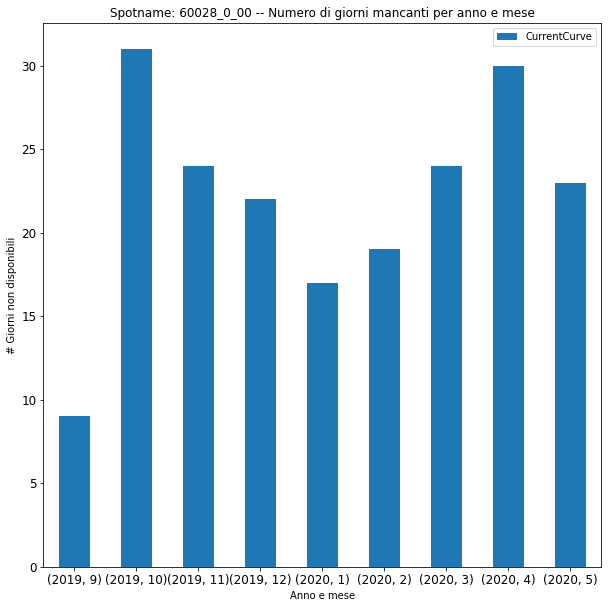

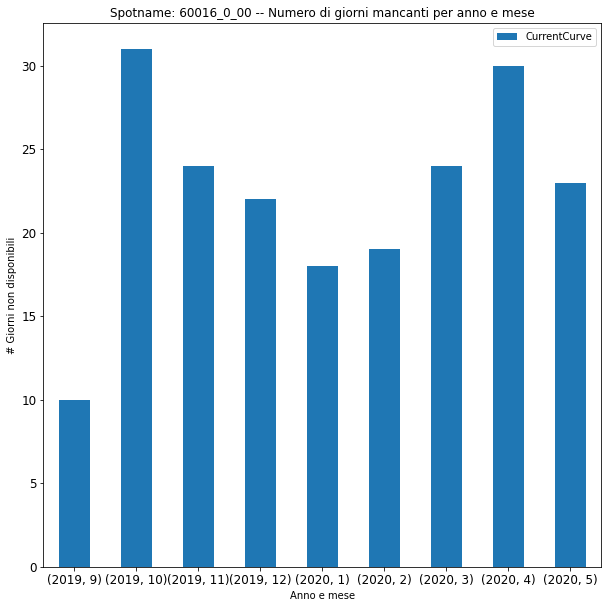

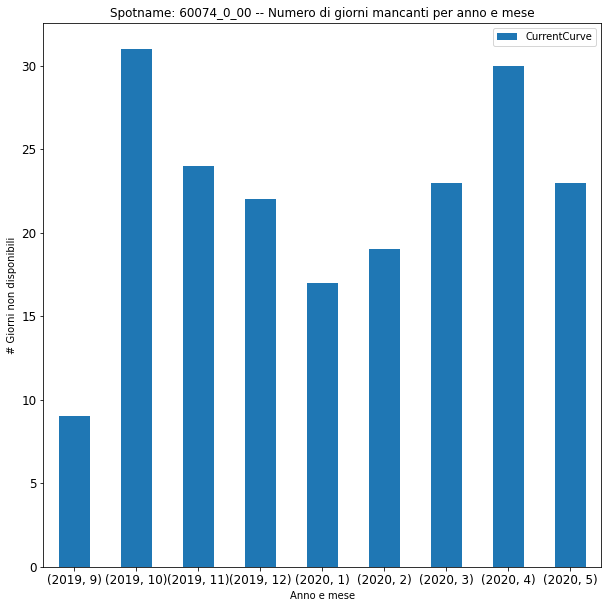

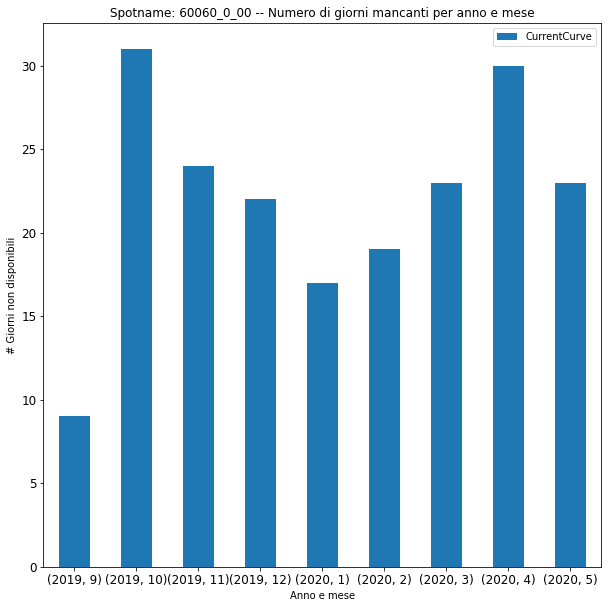

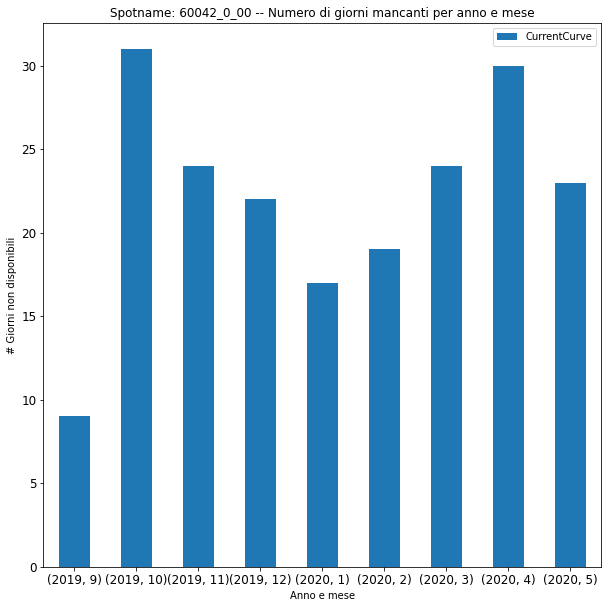

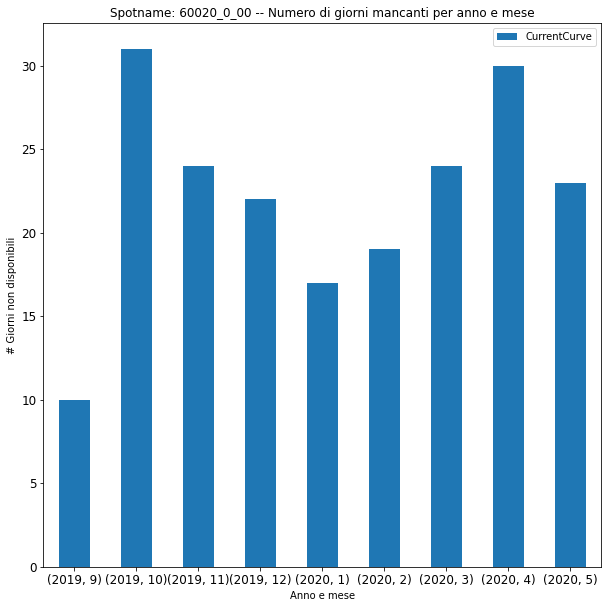

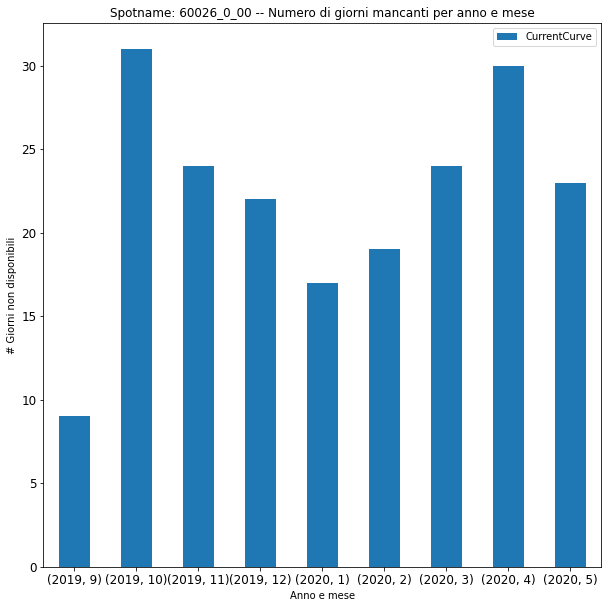

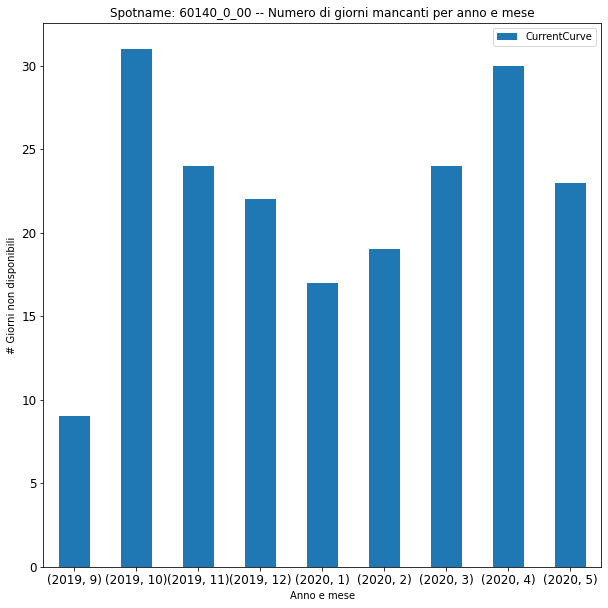

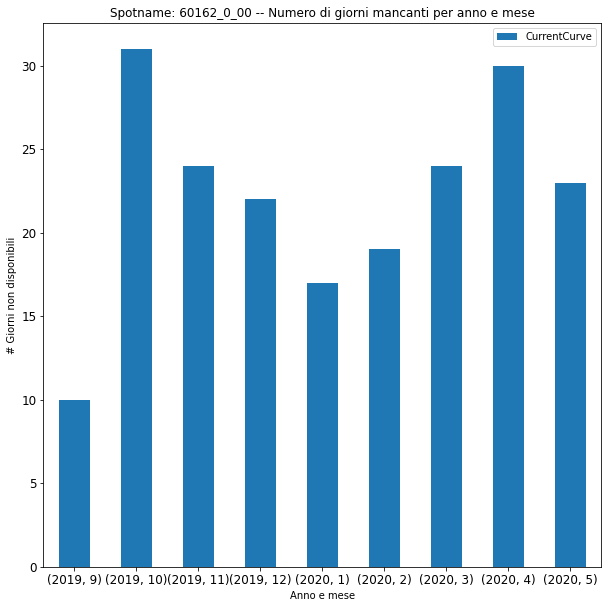

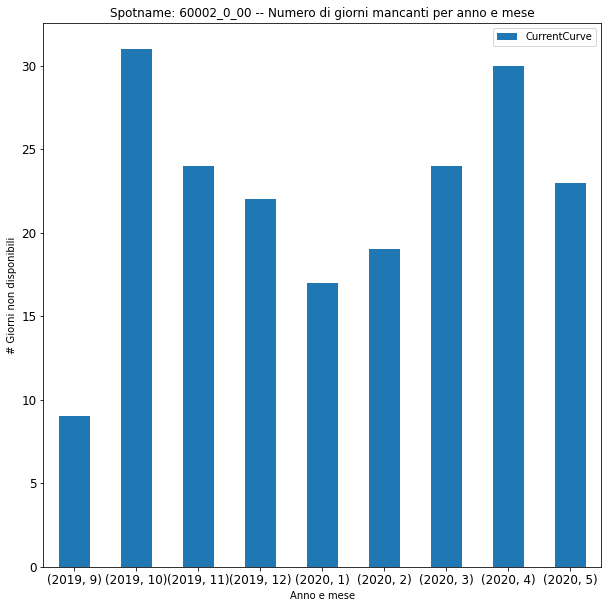

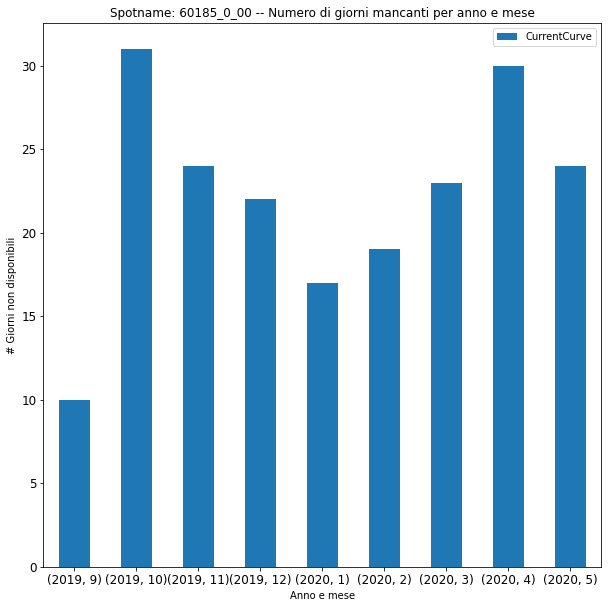

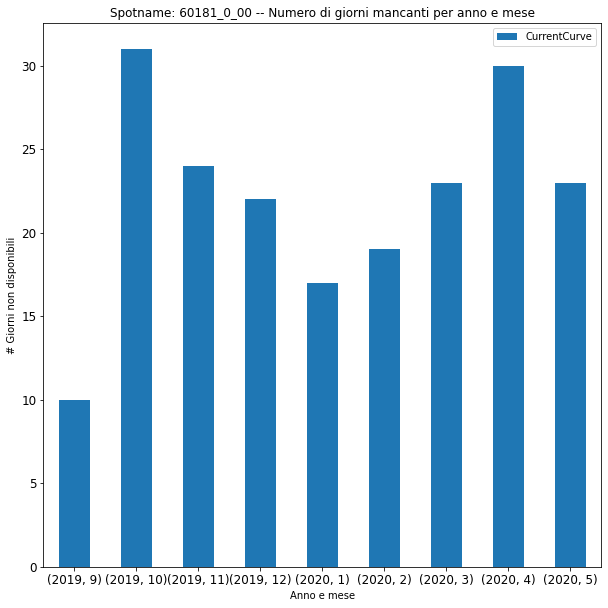

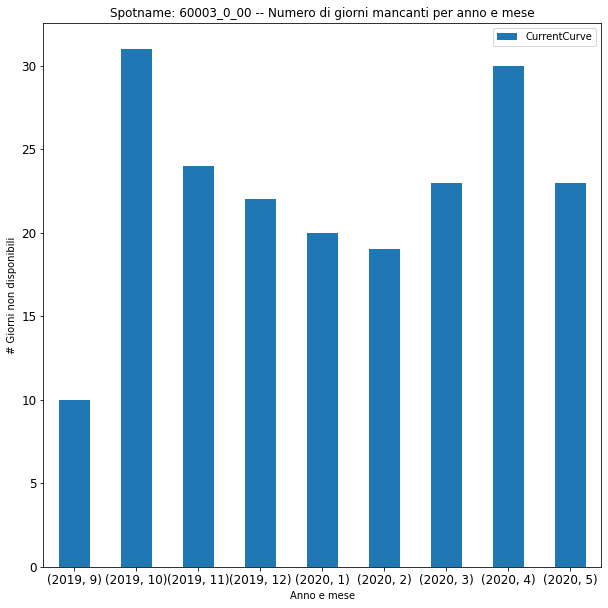

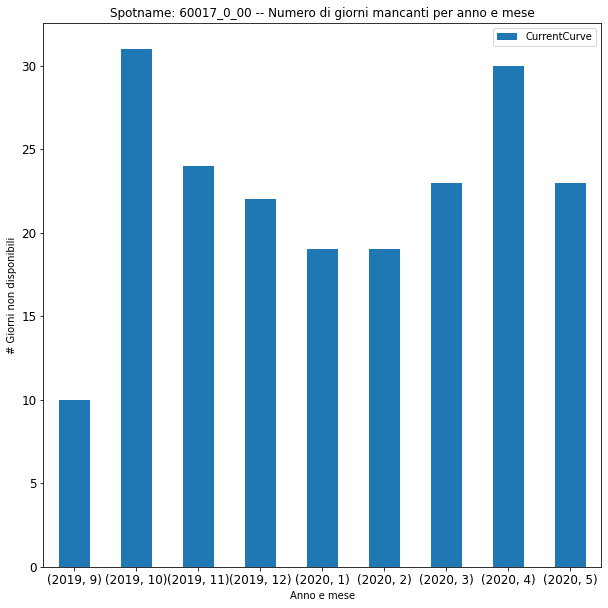

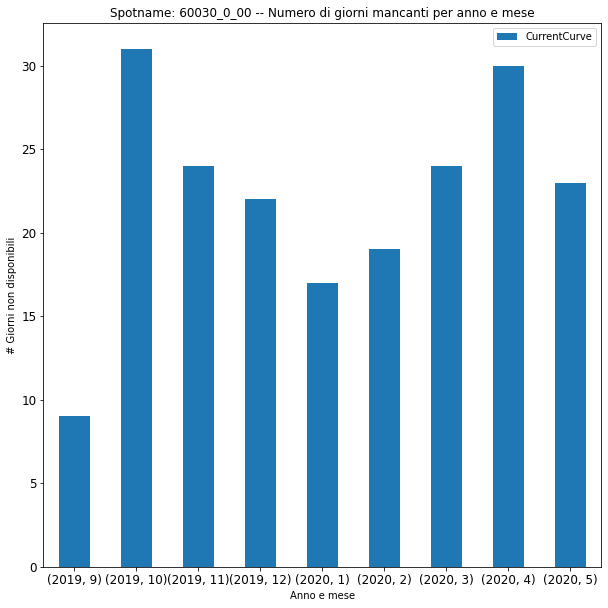

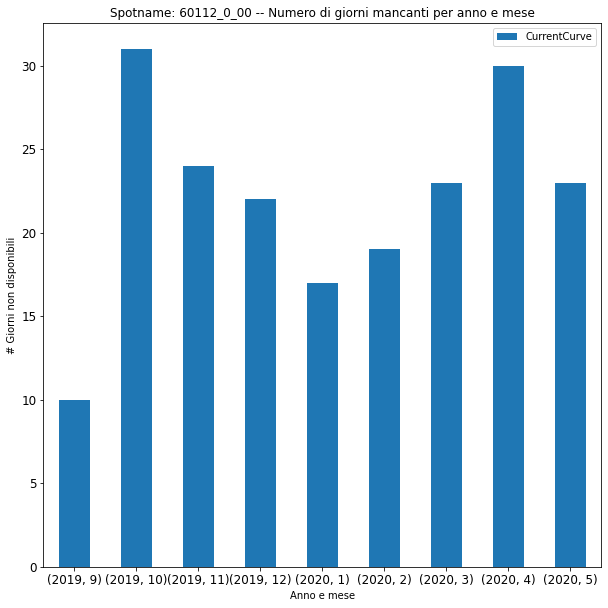

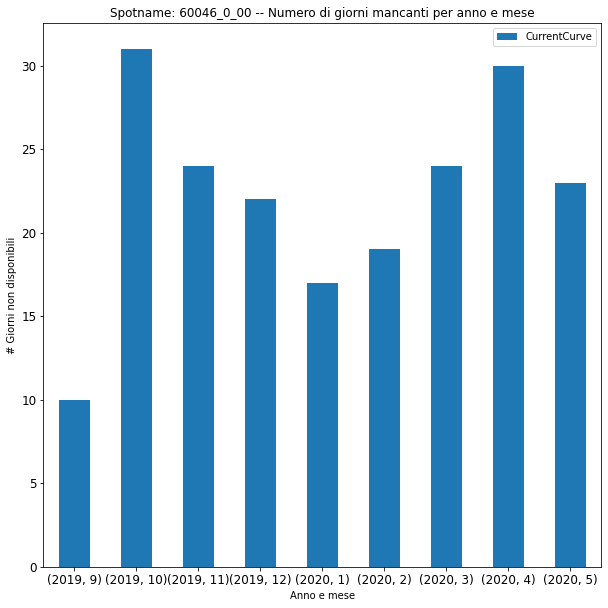

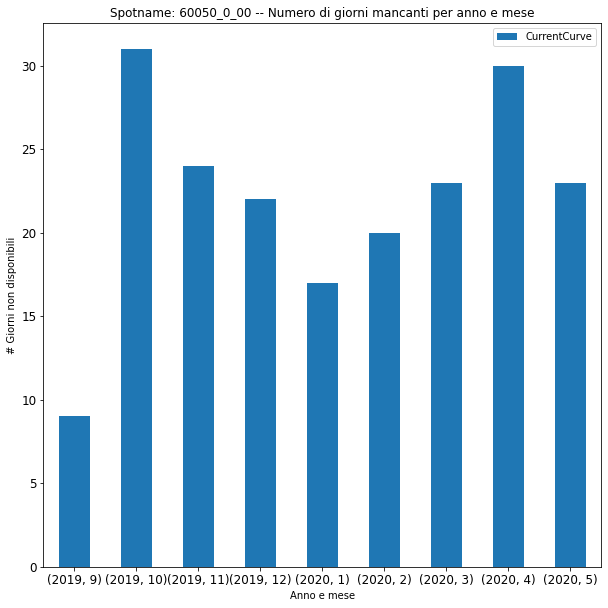

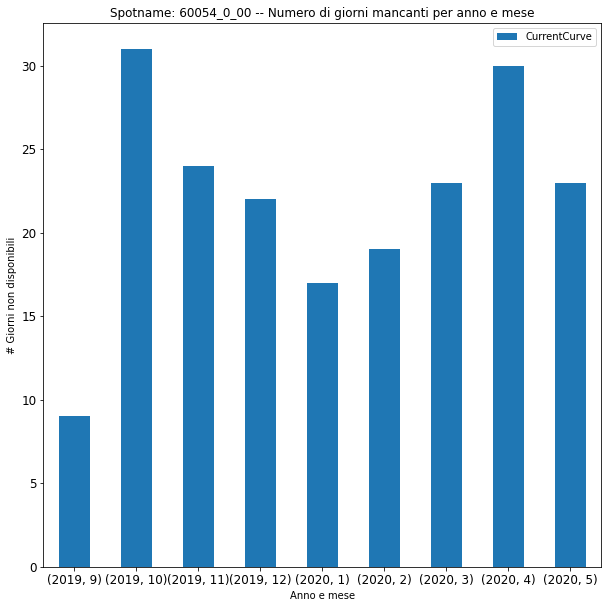

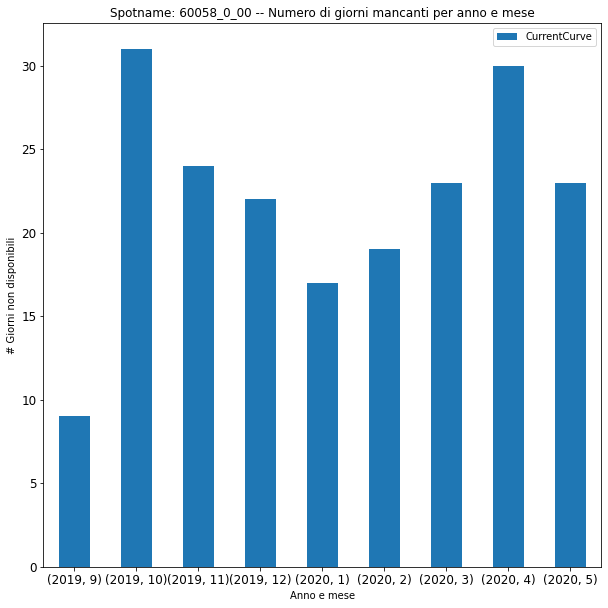

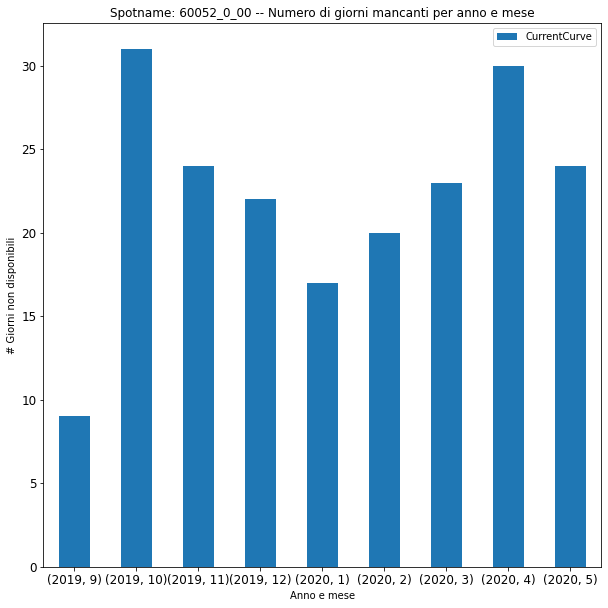

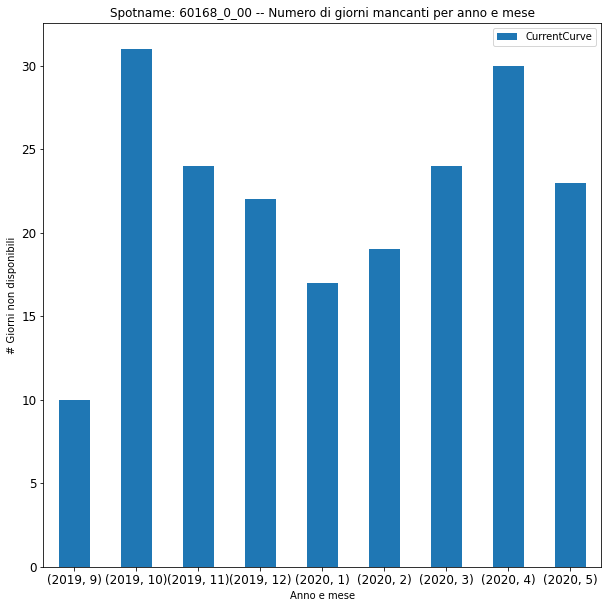

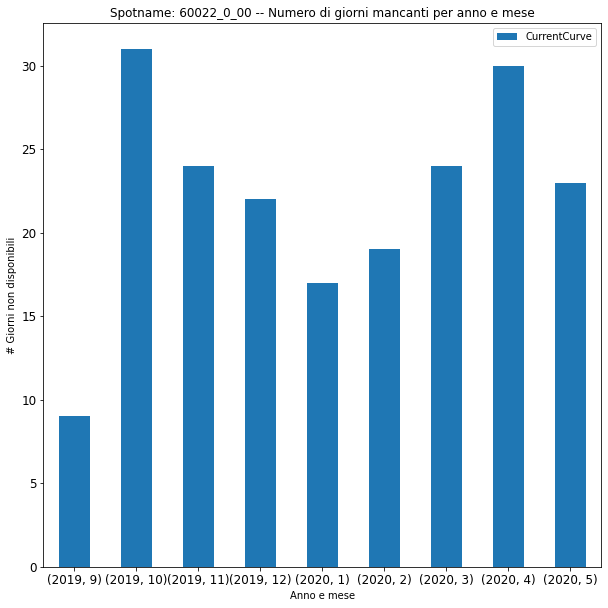

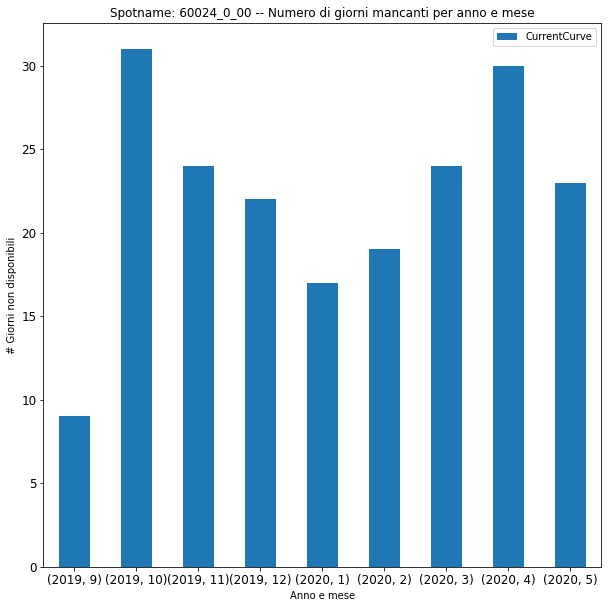

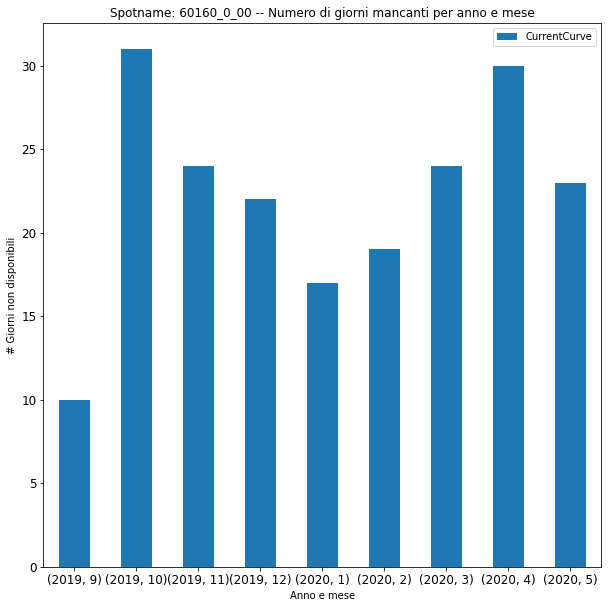

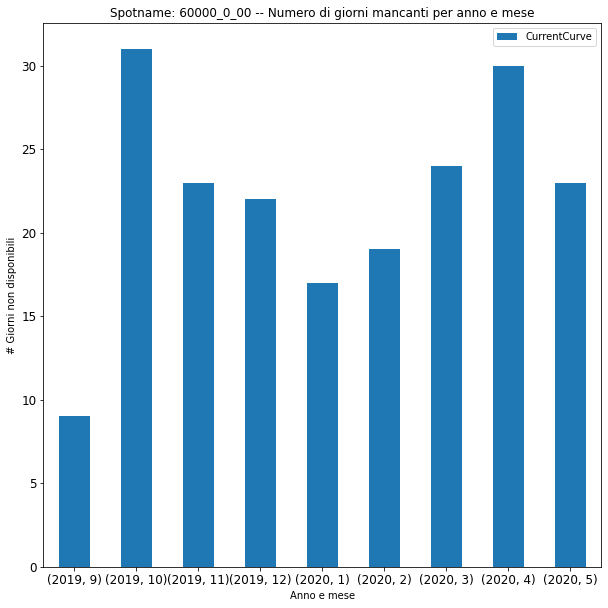

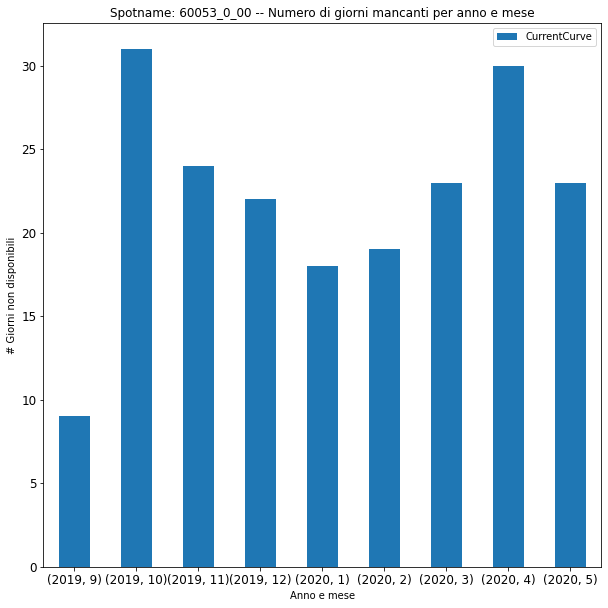

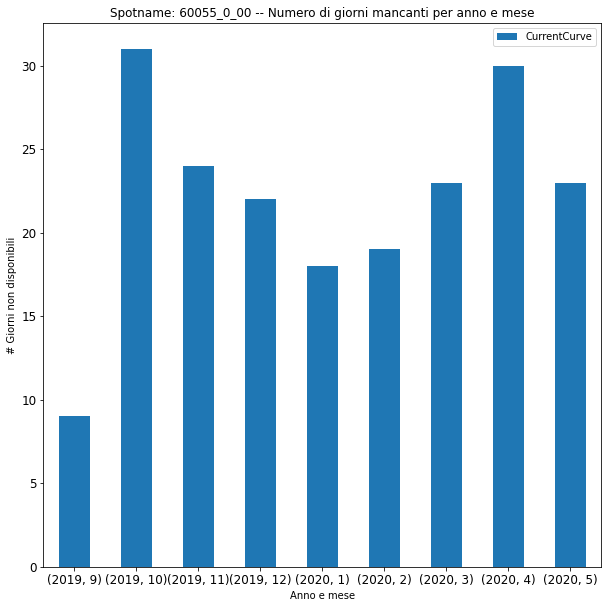

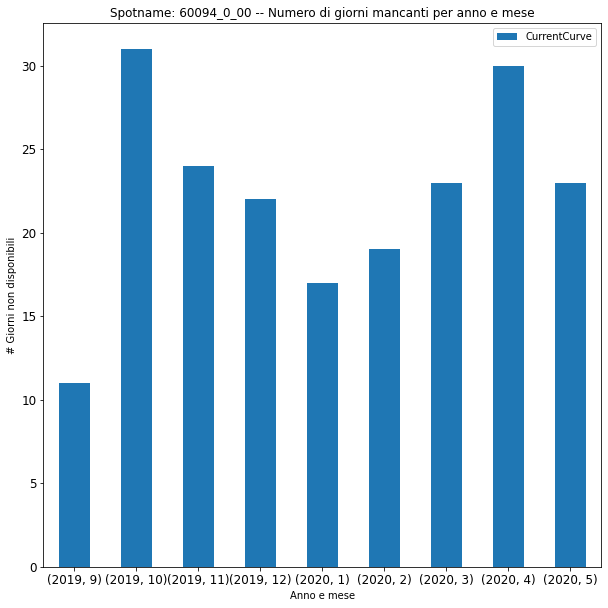

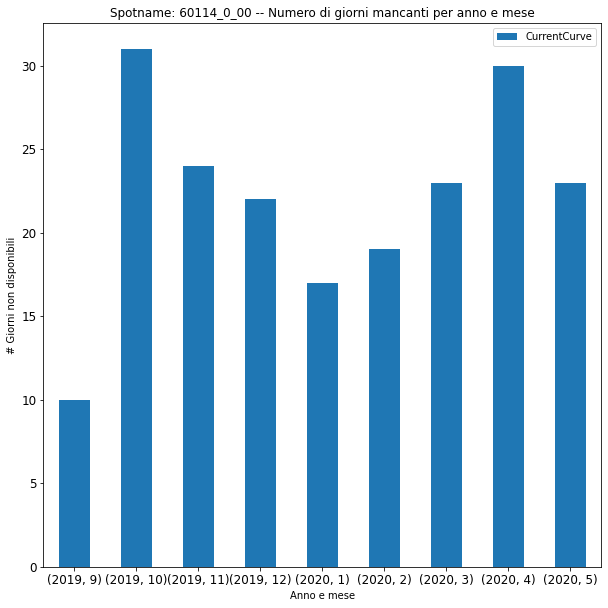

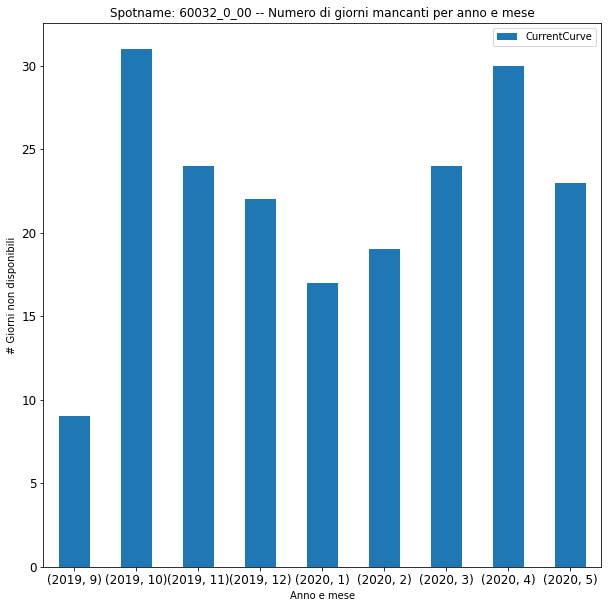

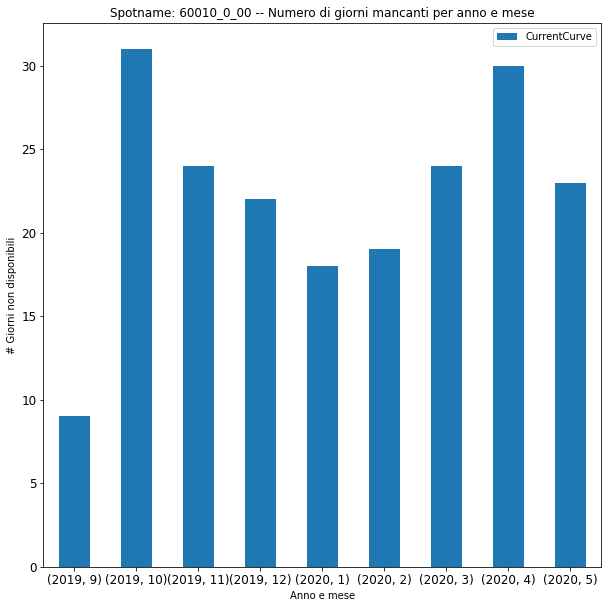

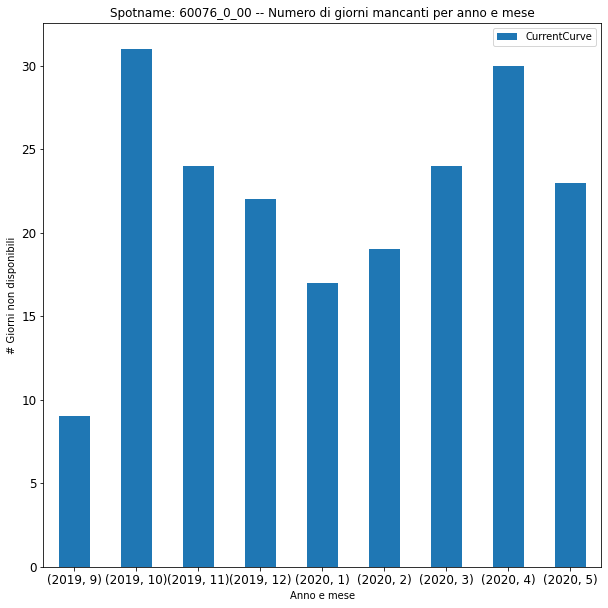

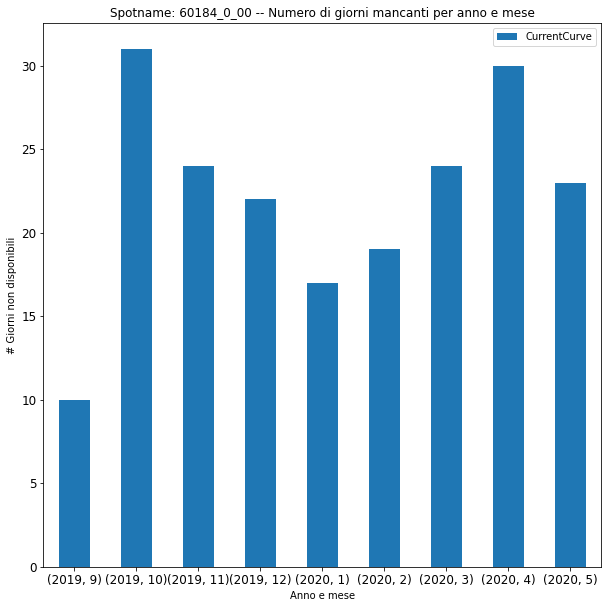

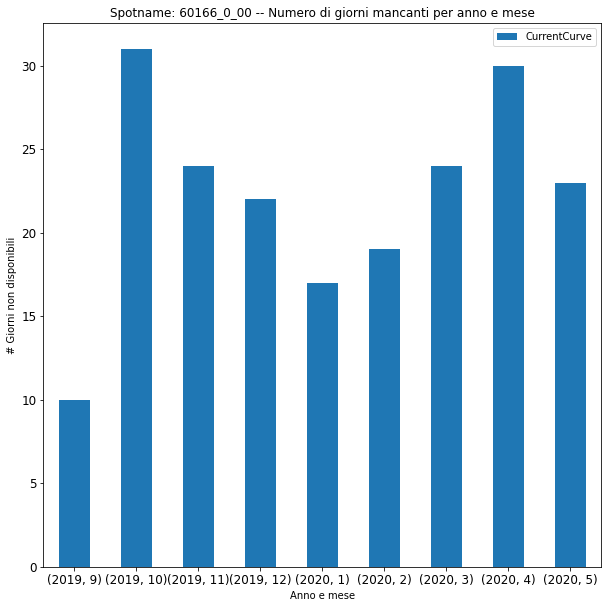

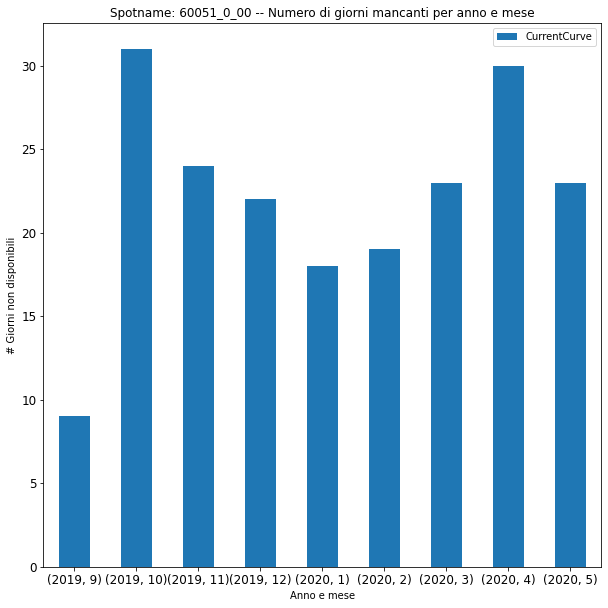

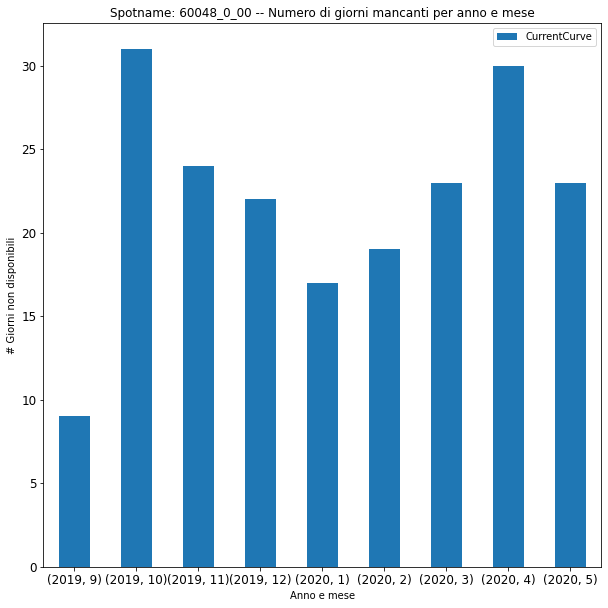

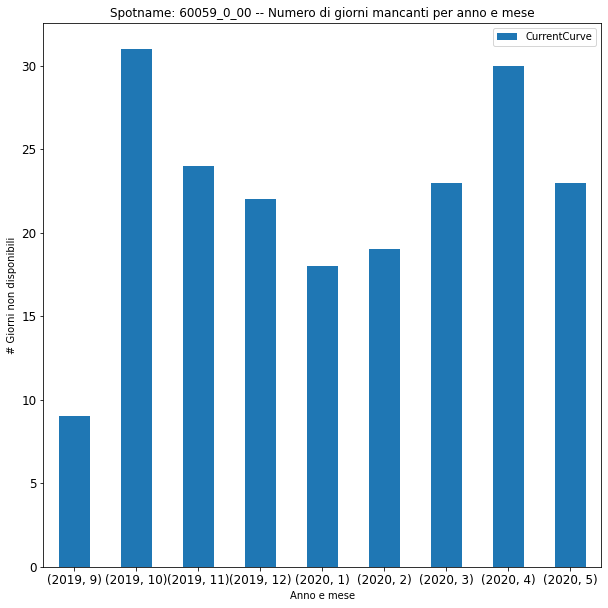

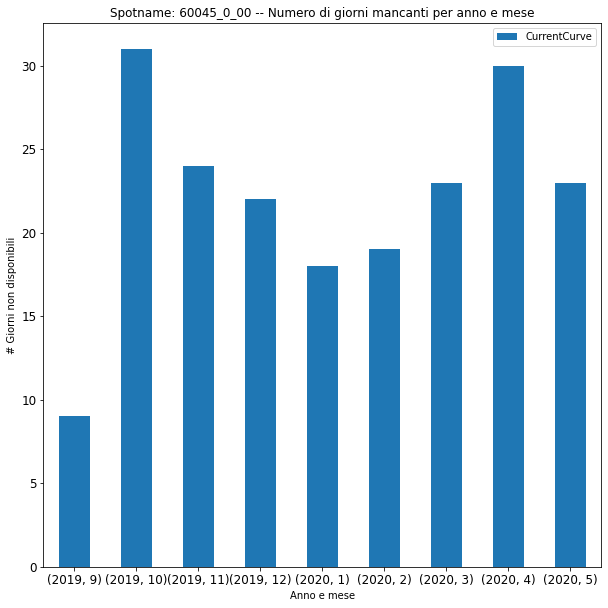

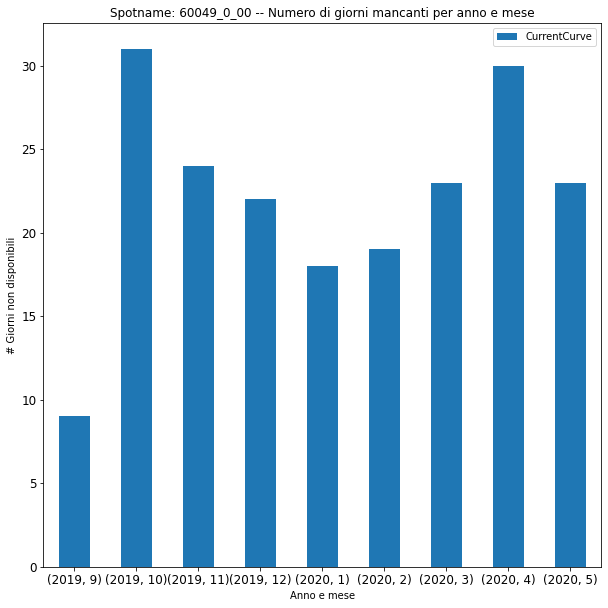

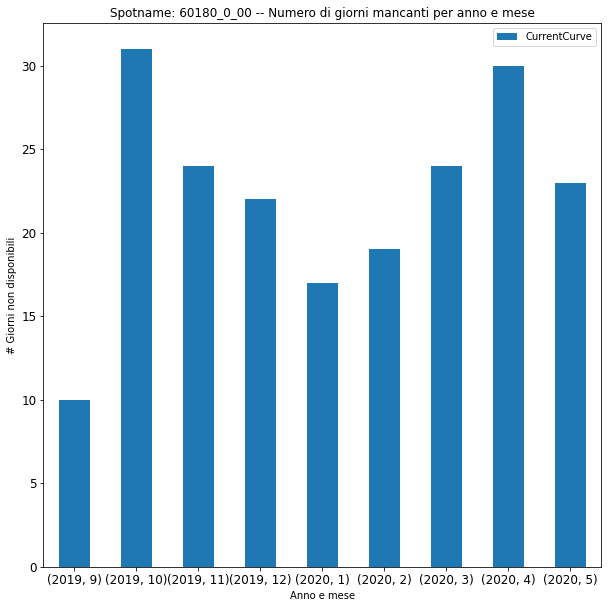

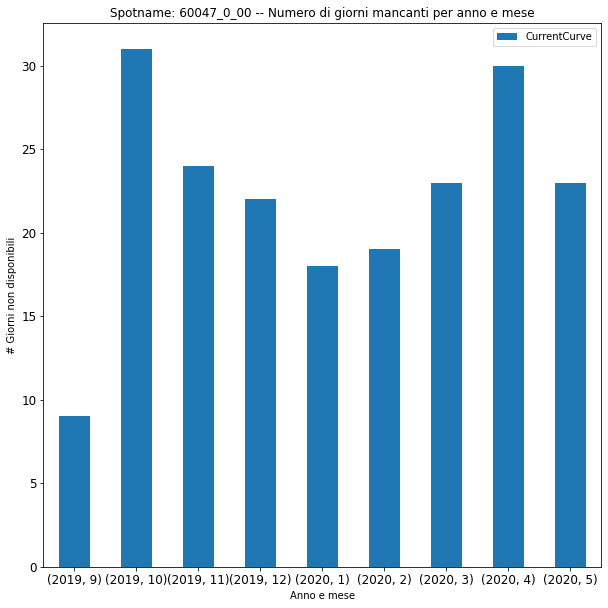

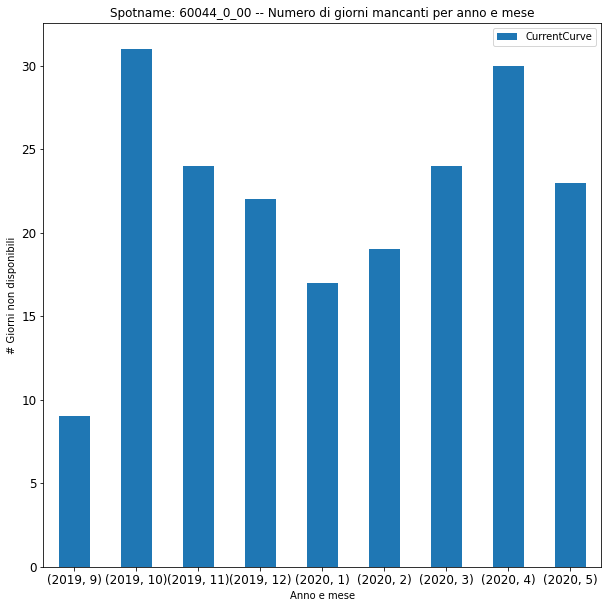

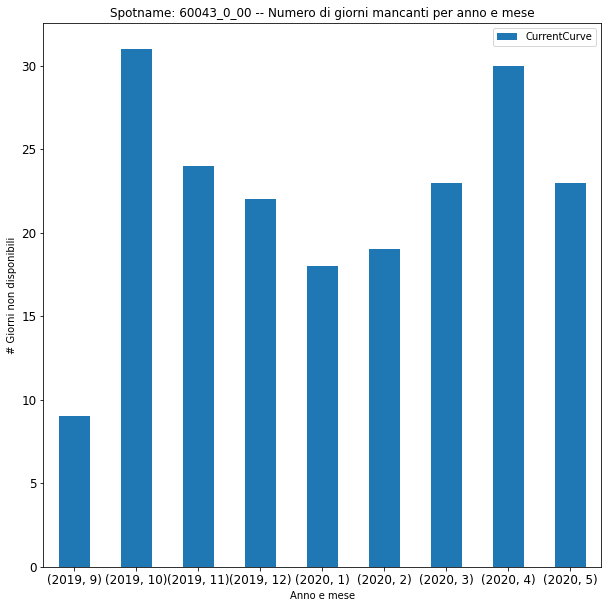

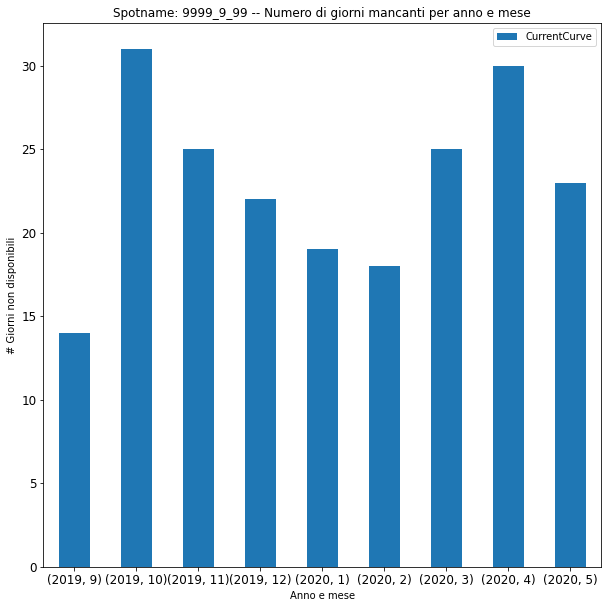

In [36]:
# I diversi spotname sembrano avere la stessa quantità di giorni mancanti
all_days_idx = pd.date_range(start='2019-09-17', end='2020-05-28', freq='1D')
for spotname in dataset.spotName.unique():
    temp_spot = dataset[(dataset.spotName == spotname)
                        ][['Date', 'CurrentCurve']]
    # droppo giorni di cui so già di avere almeno una misurazione
    temp_spot.drop_duplicates(subset=['Date'], inplace=True)
    temp_spot.set_index(temp_spot.Date, inplace=True)
    # inserisco nuovi giorni inserendo Nan per i giorni in cui non ho misurazioni
    temp_spot = temp_spot.reindex(all_days_idx)
    grouped = temp_spot.groupby([temp_spot.index.year, temp_spot.index.month]).agg(
        {'CurrentCurve': lambda x: x.isnull().sum()})
    grouped.plot(kind='bar', fontsize=12, figsize=(10, 10), rot=0,
                 title=f"Spotname: {spotname} -- Numero di giorni mancanti per anno e mese",
                 xlabel="Anno e mese",
                 ylabel="# Giorni non disponibili")

<AxesSubplot:title={'center':'Misurazioni per giorno'}, xlabel='Giorno', ylabel='Numero di misurazioni'>

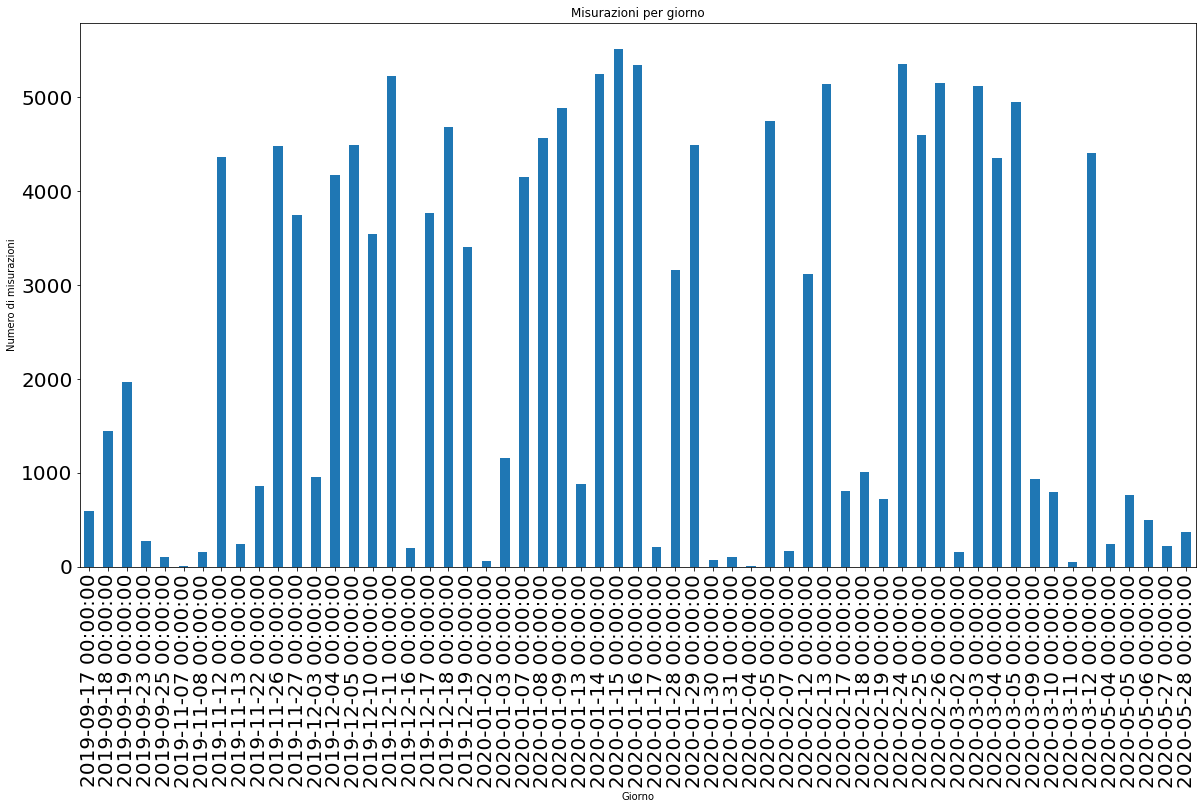

In [37]:
# quante misurazioni x giorno? OTTOBRE MANCA
count_day_misuration = dataset.groupby(['Date'])[
    'CurrentCurve'].count().reset_index()

count_day_misuration.set_index('Date')['CurrentCurve'].plot(kind='bar',
                                                            figsize=(20, 10), fontsize=20, ylabel='Numero di misurazioni', xlabel='Giorno', title='Misurazioni per giorno')

# Test set

Utilizziamo un campione preso con campionamento stratificato e lo utilizziamo successivamente per i test. Le righe al suo interno verranno tolte dal dataset che sarà utilizzato per il fit dei modelli.


In [38]:
print(dataset.shape)
dataset.drop(sample.index, inplace=True)
print(dataset.shape)

(142204, 6)
(140778, 6)


C:\Users\danie\AppData\Local\Temp\ipykernel_9732\4117220153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(sample.index, inplace=True)


In [39]:
print(sample.shape)
sample.to_pickle('../data/inference/unseen_data.pkl')

(1426, 4)


# Salvataggio dataset dopo feature engineering


Dalle analisi di cui sopra, si è notato che i dati mancanti sono molti e si è considerata la loro eventuale imputazione un'operazione che potenzialmente avrebbe potuto aumentare il bias dei futuri modelli a causa dell'inserimento di dati artificiali.<br/>
La colonna VoltageCurve viene eliminata in quanto dipendente linearmente dalla colonna CurrentCurve.

In [40]:
dataset.drop(columns=['VoltageCurve'], inplace= True)
dataset.to_pickle('../data/prepared/prepared_dataset.pkl')

C:\Users\danie\AppData\Local\Temp\ipykernel_9732\3450275834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop(columns=['VoltageCurve'], inplace= True)
